## Data Science Challenge Yuan Feng

YF Submission Version: (v20.01)

Candidate ID: C1420668

**Data Science Challenge: Card Transactions!**

## Question 1: Load

**(1)Programmatically download and load into your favorite analytical tool the transactions data. This data, which is in line-delimited JSON format, can be found here**

I wrote a class to load the dataset fully without constraint on maximum number of input rows of JSON file. The class read in the file line by line, and then reads each line of JSON text, and writes it into a pre-created csv file, then moves to the next line. This distributed fashion allows to read large files. The txt is converted to a csv format for easier manipulation.

In [267]:
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')
import json
import csv
import codecs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [4]:
class convert_json_csv():
    def __init__(self):
        self.save_csv = open('transactions_newfile.csv', 'w', encoding='utf-8', newline='')
        self.write_csv = csv.writer(self.save_csv, delimiter=',')

    def convert(self,filename):
        with codecs.open(filename,'r',encoding='utf-8') as f:
            read=f.readlines()
            flag=True
            for index,info in enumerate(read):
                data=json.loads(info)
                dD = json.dumps(data, sort_keys=True)
                dL = json.loads(dD)
                if flag: 
                    keys=list(dL.keys())
                    self.write_csv.writerow(keys) 
                    flag=False #
                    
                    
                value=list(dL.values())
                self.write_csv.writerow(value)
            self.save_csv.close()


if __name__=='__main__':
    new_file=convert_json_csv()
    content='transactions.txt'
    new_file.convert(content)

In [4]:
dt = pd.read_csv('transactions_newfile.csv')

In [5]:
print("The number of records in original data: ",len(dt[1:])+1,)
print("The number of fields in original data: ",len(dt.iloc[0]),)

The number of records in original data:  786363
The number of fields in original data:  29


**(2) Please describe the structure of the data. Number of records and fields in each record?**

 - The dataset comes in JSON format with 786363 records, each with 29 different fields.
 - After reading the dataset the structure of the JSON lines are shown below. The numeric(floats and ints) columns are accountNumber, customerId, creditLimit, availableMoney,transactionAmount, enteredCVV, cardLast4Digits, currentBalance. All other columns are stored as objects and booleans, which would require future data engineering.

In [192]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   accountOpenDate           786363 non-null  object 
 2   acqCountry                781801 non-null  object 
 3   availableMoney            786363 non-null  float64
 4   cardCVV                   786363 non-null  int64  
 5   cardLast4Digits           786363 non-null  int64  
 6   cardPresent               786363 non-null  bool   
 7   creditLimit               786363 non-null  float64
 8   currentBalance            786363 non-null  float64
 9   currentExpDate            786363 non-null  object 
 10  customerId                786363 non-null  int64  
 11  dateOfLastAddressChange   786363 non-null  object 
 12  echoBuffer                0 non-null       float64
 13  enteredCVV                786363 non-null  i

 - I then became curious of the categorical variables and picked 3 of interest to take a closer look: There are three unique types of transaction, purchase, address verification and reversal. And merchant countries most are inside US.

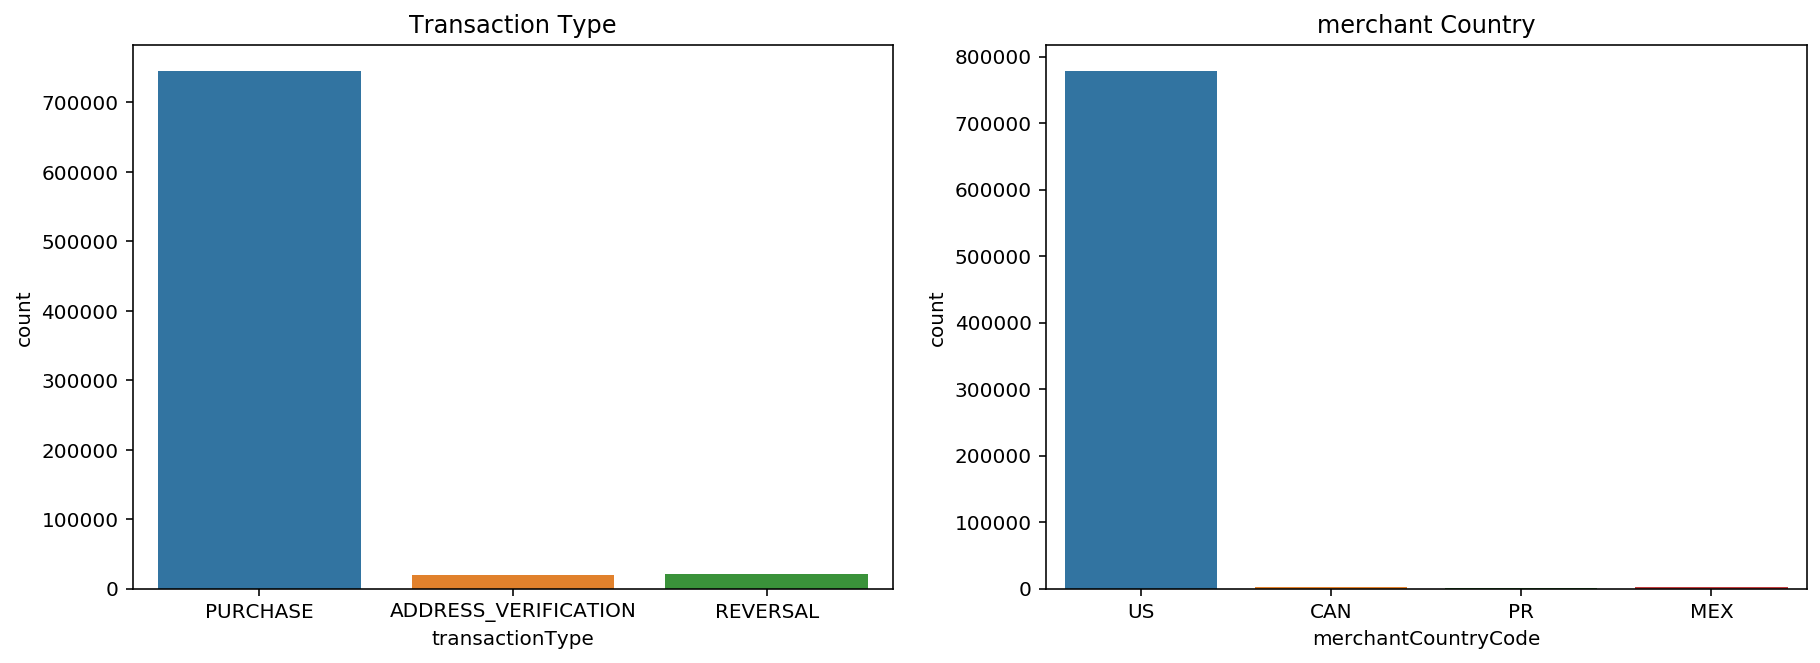

In [201]:
fig, (axis1) = plt.subplots(1,2,figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x="transactionType", data=dt).set_title("Transaction Type")
plt.subplot(1,2,2)
sns.countplot(x="merchantCountryCode", data=dt).set_title("merchant Country")
plt.show()

 - The categories of purchases is another factor of interest. Online retail, food, ride share, entainment, online gifts and fastfood are the top categories of purchase. 

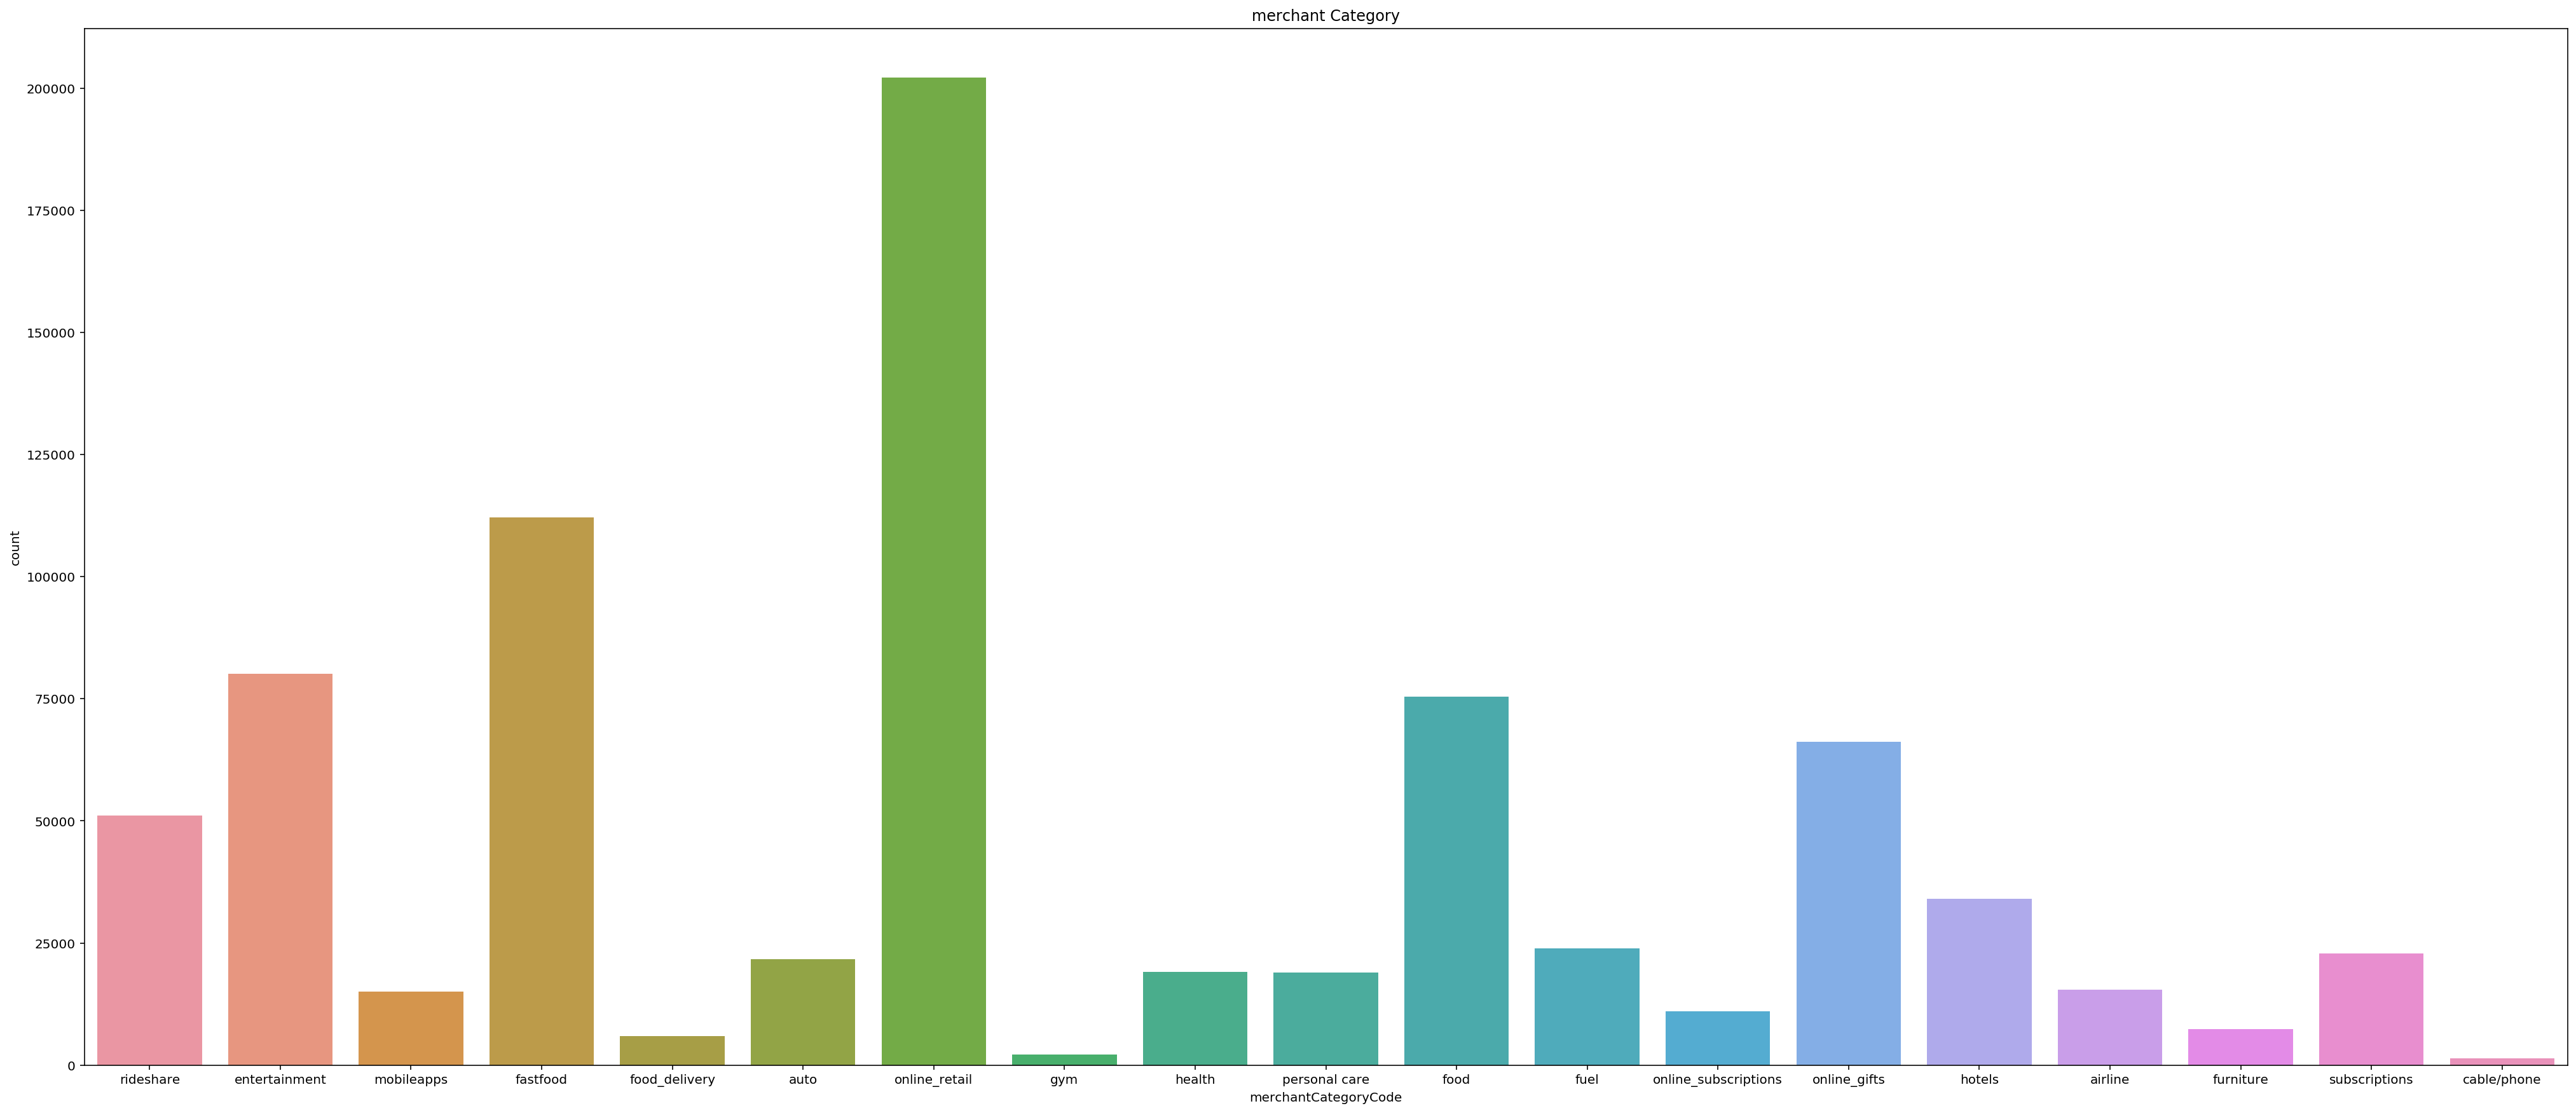

In [209]:
fig, (axis1) = plt.subplots(1,1,figsize=(35,15))
sns.countplot(x="merchantCategoryCode", data=dt).set_title("merchant Category")
plt.show()

**Missing Values**
- Various features in this dataset contain null values. "echoBuffer", "merchantCity, "merchantZip", "merchantState", "posOnPremises", "recurringAuthInd". These features will be removed in further analysis as they convey no useful information.
- Some features include some missing values, such as "acqCountry","merchantCountryCode", and "transactionType". These may be problematic in future analysis, so I will generate values to fill in the missing one or remove the missing values if it is necessary to include them.

In [130]:
num_null = pd.DataFrame(dt.isnull().sum())
num_null.columns = ["Count of Null"]
num_null

,Count of Null
accountNumber,0
accountOpenDate,0
acqCountry,4562
availableMoney,0
cardCVV,0
cardLast4Digits,0
cardPresent,0
creditLimit,0
currentBalance,0
currentExpDate,0


**Summary**

Below is a plot that summarizes the important statistics of this dataset, including the minimum, maximum, count, mean and standard deviation, etc.

In [158]:
pd.set_option('display.max_columns', None)

#drop columns of string values
sta= dt.describe().drop(["echoBuffer","merchantCity","merchantState","merchantZip","posOnPremises","recurringAuthInd"],axis=1).transpose()
sta

,count,mean,std,min,25%,50%,75%,max
accountNumber,786363.0,5.372326e+08,2.554211e+08,1.000881e+08,3.301333e+08,5.074561e+08,7.676200e+08,9.993896e+08
availableMoney,786363.0,6.250725e+03,8.880784e+03,-1.005630e+03,1.077420e+03,3.184860e+03,7.500000e+03,5.000000e+04
cardCVV,786363.0,5.444673e+02,2.615242e+02,1.000000e+02,3.100000e+02,5.350000e+02,7.850000e+02,9.980000e+02
cardLast4Digits,786363.0,4.757418e+03,2.996584e+03,0.000000e+00,2.178000e+03,4.733000e+03,7.338000e+03,9.998000e+03
creditLimit,786363.0,1.075946e+04,1.163617e+04,2.500000e+02,5.000000e+03,7.500000e+03,1.500000e+04,5.000000e+04
currentBalance,786363.0,4.508739e+03,6.457442e+03,0.000000e+00,6.899100e+02,2.451760e+03,5.291095e+03,4.749881e+04
customerId,786363.0,5.372326e+08,2.554211e+08,1.000881e+08,3.301333e+08,5.074561e+08,7.676200e+08,9.993896e+08
enteredCVV,786363.0,5.441839e+02,2.615513e+02,0.000000e+00,3.100000e+02,5.350000e+02,7.850000e+02,9.980000e+02
posConditionCode,785954.0,3.271980e+00,9.809023e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.900000e+01
posEntryMode,782309.0,9.049943e+00,1.677413e+01,2.000000e+00,2.000000e+00,5.000000e+00,9.000000e+00,9.000000e+01


## Question 2: Plot

**(1)Plot a histogram of the processed amounts of each transaction, the transactionAmount column.**

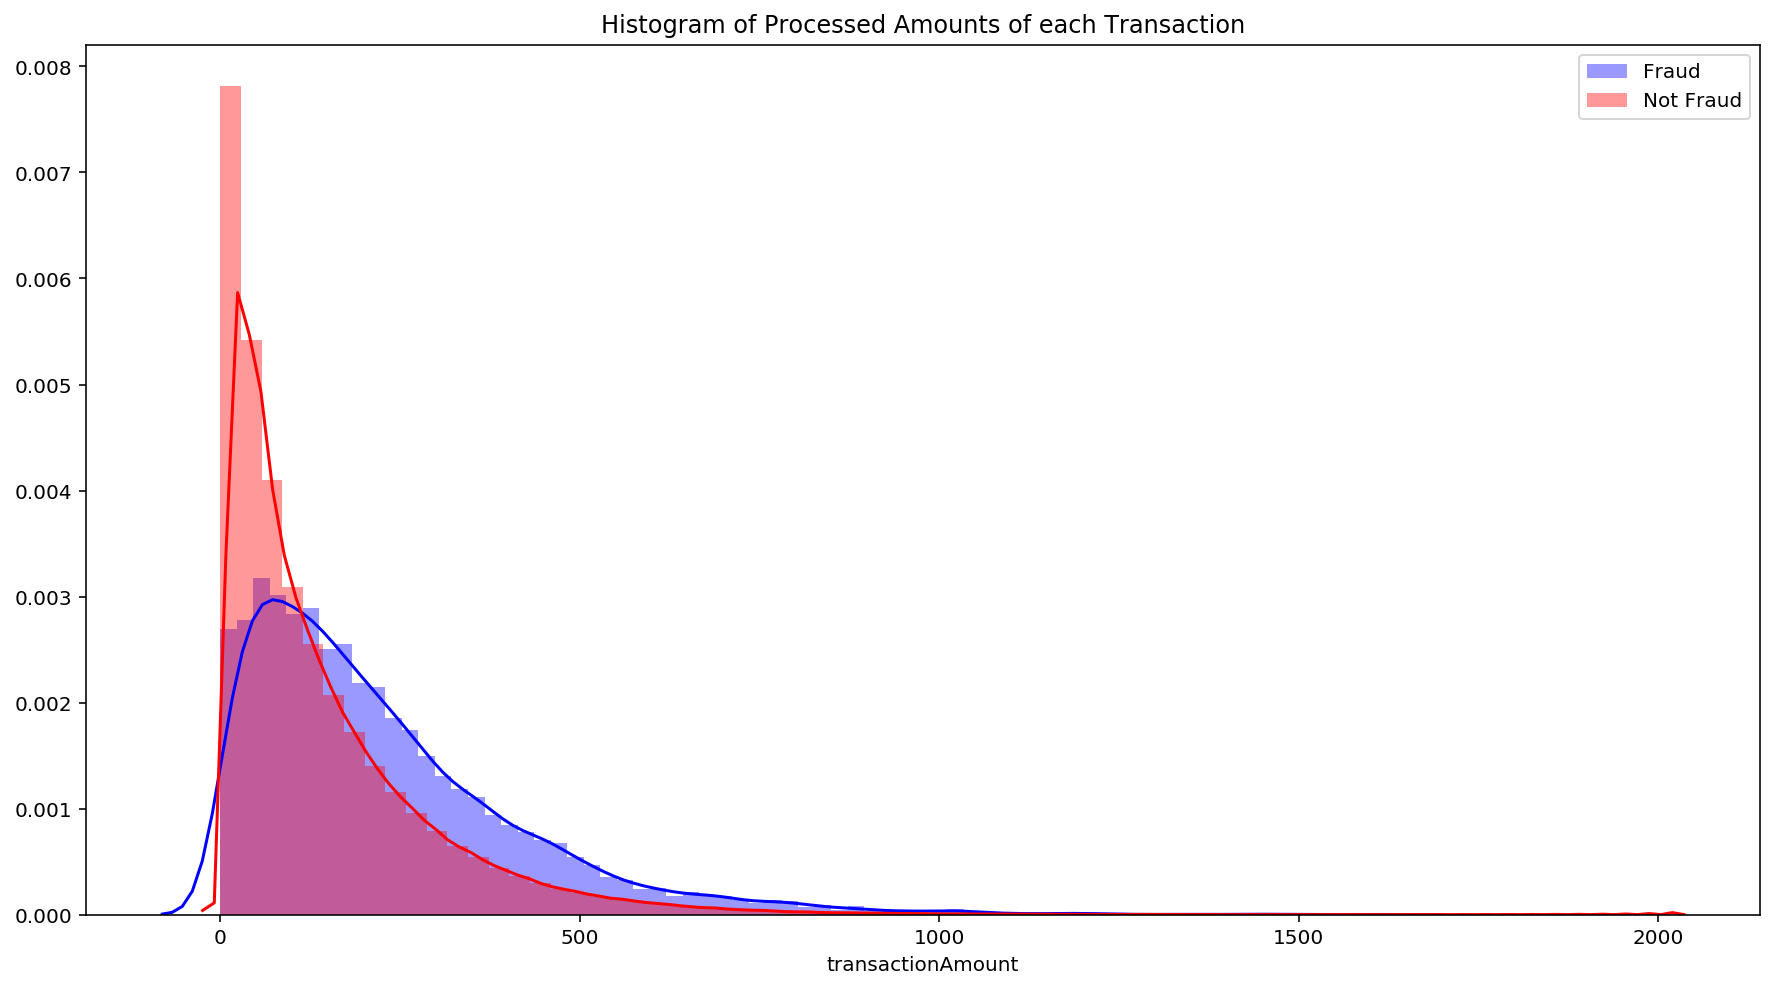

In [198]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,8))
sns.distplot(dt[dt.isFraud==True].transactionAmount, bins=70,color='blue' )
sns.distplot(dt[dt.isFraud==False].transactionAmount, bins=70,color='red').set_title("Histogram of Processed Amounts of each Transaction")
plt.legend(labels=['Fraud', 'Not Fraud'])
plt.show()


**(2) Report any structure you find and any hypotheses you have about that structure.**

One interesting structure I found in fraudulent transactions is that the peak is at about 100 dollars while the peak of non-fraudulent transactions is at about 10 dollars. This indicates that normal transactions are more likely to occur in small amount while fraudulent transactions tend to aim for a higher amount.

## Question 3: Data Wrangling - Duplicate Transactions

You will notice a number of what look like duplicated transactions in the data set. One type of duplicated transaction is a reversed transaction, where a purchase is followed by a reversal. Another example is a multi-swipe, where a vendor accidentally charges a customer's card multiple times within a short time span.

**(1) Can you programmatically identify reversed and multi-swipe transactions?**

 - The reversed transactions are categorized as "REVERSAL", so I removed them by subsetting the dataset.
 - The multi-swipe transactions are a bit more tricky:
 
 
  - How to define a multi-swipe transaction? 
  
  To define a multi-swipe transaction, it would mean the same account has a second transaction of the same amount in a very small period of time. With this criteria, I first converted the string format of transaction time data into timestamp format, then counted the difference in transaction time. So if the difference is small enough, I marked this record as a multi-swipe.
 

In [214]:
reversed_tra = dt[dt.transactionType=="REVERSAL"]
reversed_tra.head()

,accountNumber,accountOpenDate,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,currentExpDate,customerId,dateOfLastAddressChange,echoBuffer,enteredCVV,expirationDateKeyInMatch,isFraud,merchantCategoryCode,merchantCity,merchantCountryCode,merchantName,merchantState,merchantZip,posConditionCode,posEntryMode,posOnPremises,recurringAuthInd,transactionAmount,transactionDateTime,transactionType,tran_time,diff,same_account,diff_seconds
39,574788567,2015-10-13,US,2200.98,206,8522,True,2500.0,299.02,10/2021,574788567,2015-10-13,NaN,206,False,False,auto,NaN,US,Convenient Tire,NaN,NaN,1.0,9.0,NaN,NaN,215.13,2016-05-24T01:38:03,REVERSAL,2016-05-24 01:38:03,0 days 00:02:30,0.0,150.0
73,574788567,2015-10-13,US,2432.72,579,4219,True,2500.0,67.28,10/2022,574788567,2015-10-13,NaN,579,False,False,auto,NaN,US,Eazy Repair,NaN,NaN,1.0,5.0,NaN,NaN,3.87,2016-10-07T10:23:57,REVERSAL,2016-10-07 10:23:57,0 days 01:32:07,0.0,5527.0
101,924729945,2014-07-25,US,49831.43,205,9459,False,50000.0,168.57,11/2024,924729945,2014-07-25,NaN,265,False,False,online_retail,NaN,US,discount.com,NaN,NaN,1.0,5.0,NaN,NaN,168.57,2016-10-19T14:01:45,REVERSAL,2016-10-19 14:01:45,15 days 09:41:41,0.0,1330901.0
133,984504651,2015-07-27,US,46367.41,640,8332,False,50000.0,3632.59,08/2028,984504651,2015-07-27,NaN,640,False,False,health,NaN,US,Planet Fitness #849960,NaN,NaN,1.0,5.0,NaN,NaN,450.74,2016-01-16T09:53:15,REVERSAL,2016-01-16 09:53:15,0 days 00:00:45,0.0,45.0
156,984504651,2015-07-27,US,41909.30,640,8332,True,50000.0,8090.70,12/2031,984504651,2015-07-27,NaN,640,False,False,entertainment,NaN,US,AMC #724446,NaN,NaN,1.0,9.0,NaN,NaN,81.73,2016-01-25T20:39:15,REVERSAL,2016-01-25 20:39:15,0 days 02:51:40,0.0,10300.0


In [6]:
from datetime import datetime
dt['tran_time'] = dt['transactionDateTime'].apply(lambda x:datetime.strptime(x, '%Y-%m-%dT%H:%M:%S'))
dt['diff'] = dt.tran_time - dt.tran_time.shift(1)
dt['same_account'] = dt.accountNumber - dt.accountNumber.shift(1)
dt['diff_seconds']=dt['diff'].astype('timedelta64[s]')
dt.head()

,accountNumber,accountOpenDate,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,currentExpDate,...,posEntryMode,posOnPremises,recurringAuthInd,transactionAmount,transactionDateTime,transactionType,tran_time,diff,same_account,diff_seconds
0,737265056,2015-03-14,US,5000.0,414,1803,False,5000.0,0.0,06/2023,...,2.0,NaN,NaN,98.55,2016-08-13T14:27:32,PURCHASE,2016-08-13 14:27:32,NaT,NaN,NaN
1,737265056,2015-03-14,US,5000.0,486,767,True,5000.0,0.0,02/2024,...,9.0,NaN,NaN,74.51,2016-10-11T05:05:54,PURCHASE,2016-10-11 05:05:54,58 days 14:38:22,0.0,5063902.0
2,737265056,2015-03-14,US,5000.0,486,767,False,5000.0,0.0,08/2025,...,9.0,NaN,NaN,7.47,2016-11-08T09:18:39,PURCHASE,2016-11-08 09:18:39,28 days 04:12:45,0.0,2434365.0
3,737265056,2015-03-14,US,5000.0,486,767,False,5000.0,0.0,08/2025,...,9.0,NaN,NaN,7.47,2016-12-10T02:14:50,PURCHASE,2016-12-10 02:14:50,31 days 16:56:11,0.0,2739371.0
4,830329091,2015-08-06,US,5000.0,885,3143,True,5000.0,0.0,10/2029,...,2.0,NaN,NaN,71.18,2016-03-24T21:04:46,PURCHASE,2016-03-24 21:04:46,-261 days +18:49:56,93064035.0,-22482604.0


 - How to define "small enough"? 
  
  There are no clear standards of how each bank defines this time length. 
  
  Luckily this is a big enough dataset which would allow me to make inferences. I took a look at the number of transactions in time slots of 30 seconds. Since multi-swipe happens as an unsual incident, there should also be unsual pattern in the count of number of transaction.
  
  Again luckily, I was able to find the number of transactions would fluctuate a lot in the first 180 seconds after the transaction and after it became very flat. Based on this pattern, I chose 180 seconds as the threshold of classifying a multi-swipe transaction.

In [10]:
multi = dt[(dt['diff_seconds']<420) & (dt['diff_seconds']>0) & (dt['same_account']==0)]

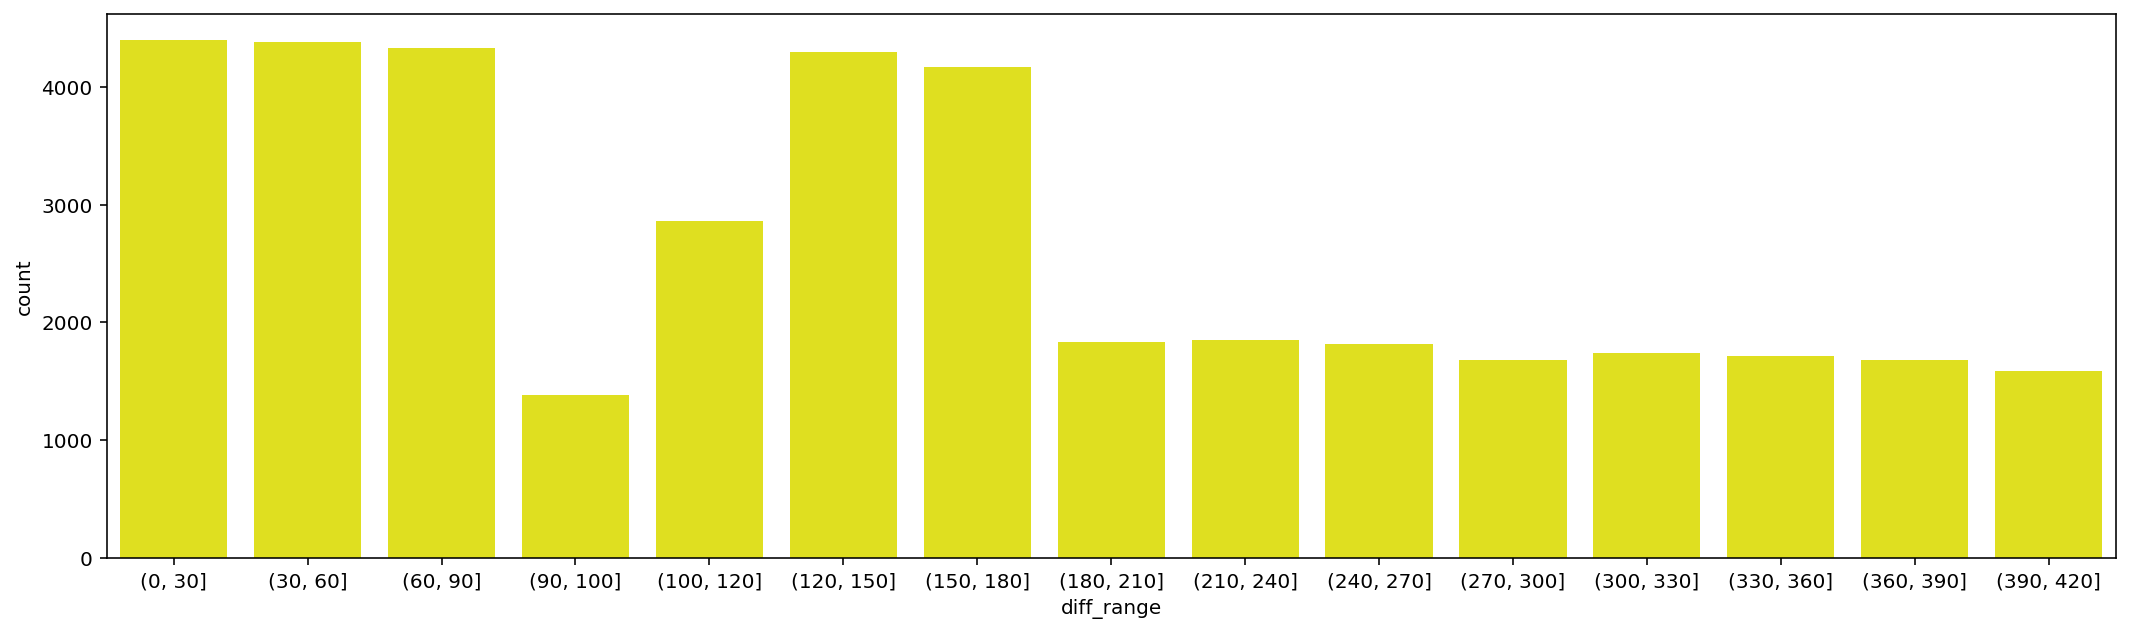

In [13]:
fig, (axis1) = plt.subplots(1,1,figsize=(18,5))
multi['diff_range'] = pd.cut(multi["diff_seconds"], [0,30, 60,90,100,120,150,180,210,240,270,300,330,360,390,420])
sns.countplot(x="diff_range", data=multi,color = "yellow")
plt.show()

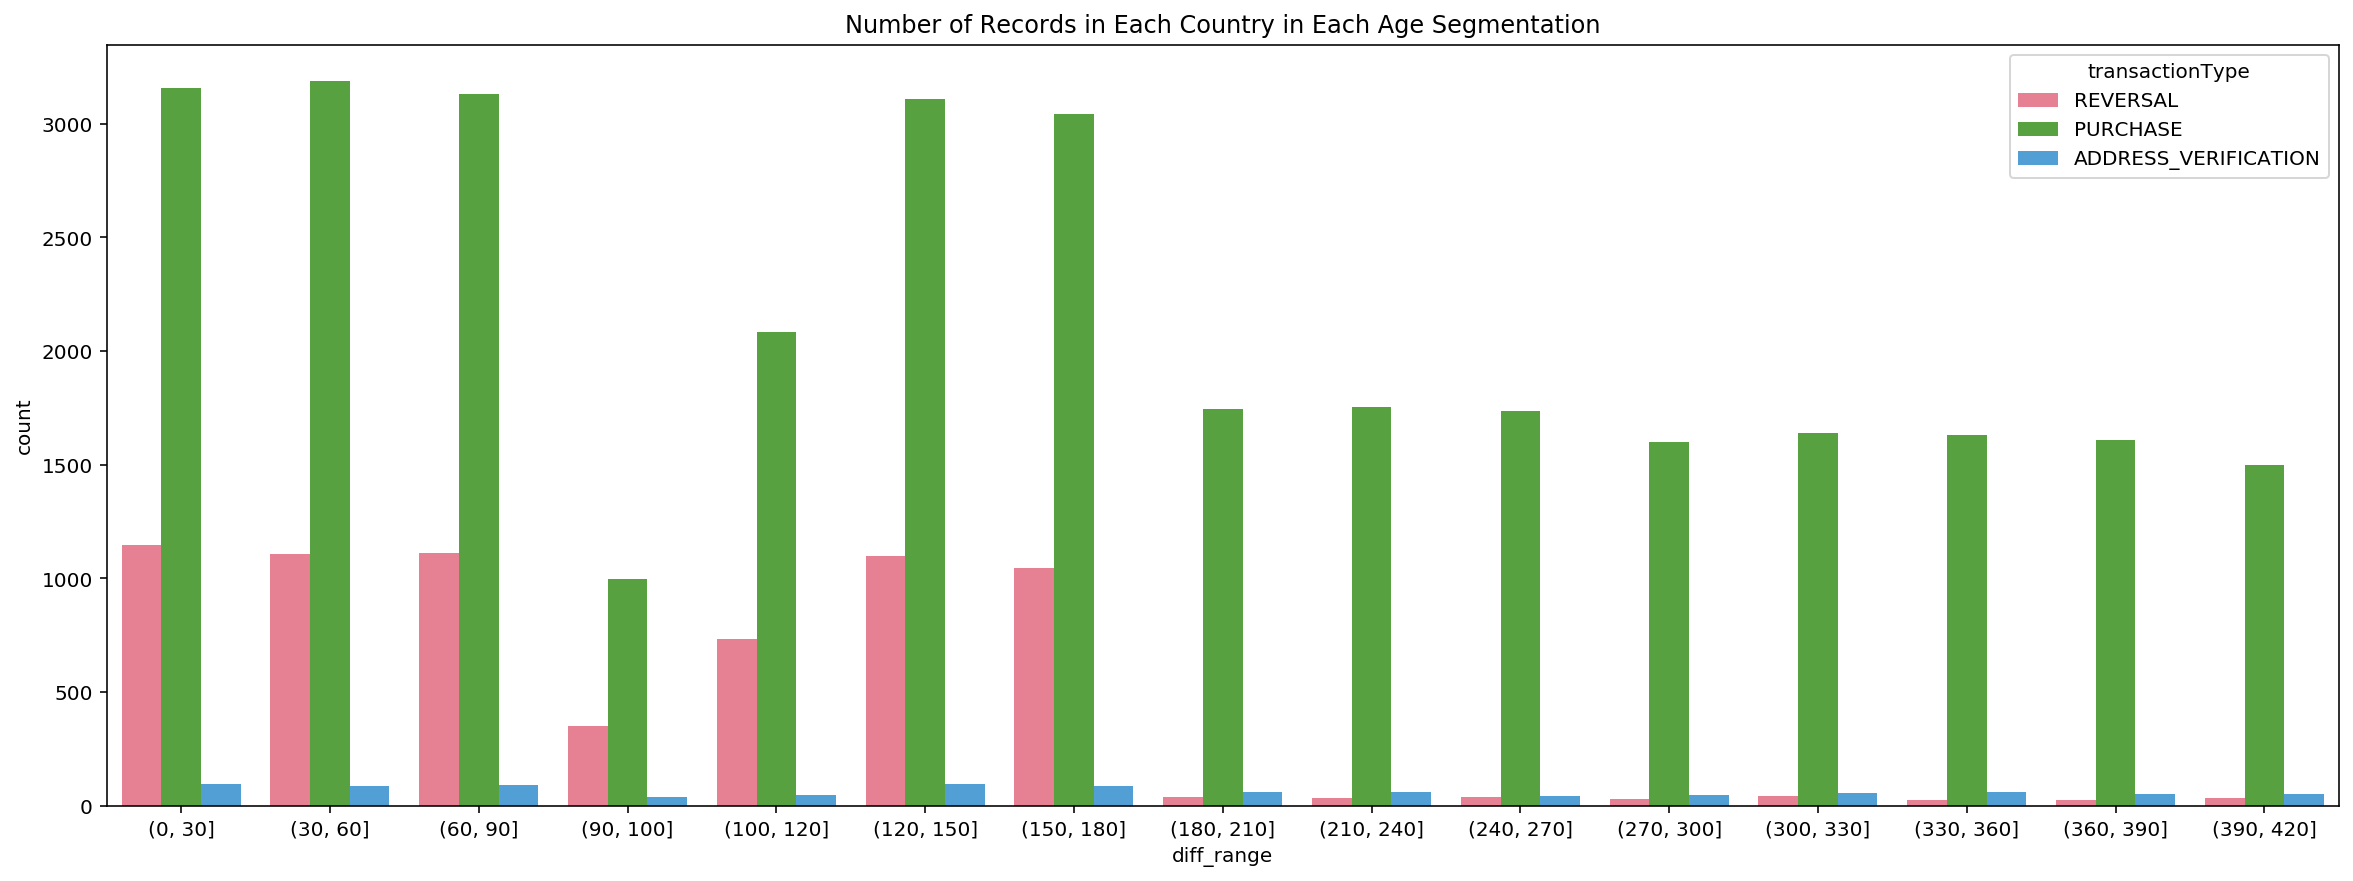

In [288]:
fig, (axis1) = plt.subplots(1,1,figsize=(20,7))
multi['diff_range'] = pd.cut(multi["diff_seconds"], [0,30, 60,90,100,120,150,180,210,240,270,300,330,360,390,420])
sns.countplot(x="diff_range",hue="transactionType", data=multi, palette="husl").set_title("Number of Records in Each Country in Each Age Segmentation")
plt.show()

**(2) What total number of transactions and total dollar amount do you estimate for the reversed transactions? For the multi-swipe transactions? (please consider the first transaction to be "normal" and exclude it from the number of transaction and dollar amount counts)**


 - The dollar amount is 2821792.5 for reversed transactions and 3674021.9 for multi-swipe transactions.

In [217]:
multi_180 = dt[(dt['diff_seconds']<180) & (dt['diff_seconds']>0) & (dt['same_account']==0)]
multi_180.transactionAmount.sum().round(1)

3674021.9

In [215]:
reversed_tra.transactionAmount.sum()

2821792.5

**(3) Did you find anything interesting about either kind of transaction?**

-  The multi-swipe transactions are more likely to happen at 8AM, 10AM, and 12AM while the normal transactions show no discernable pattens in transaction time. 


Text(0.5, 1.0, 'Fraudulent Transaction for multi-swipe')

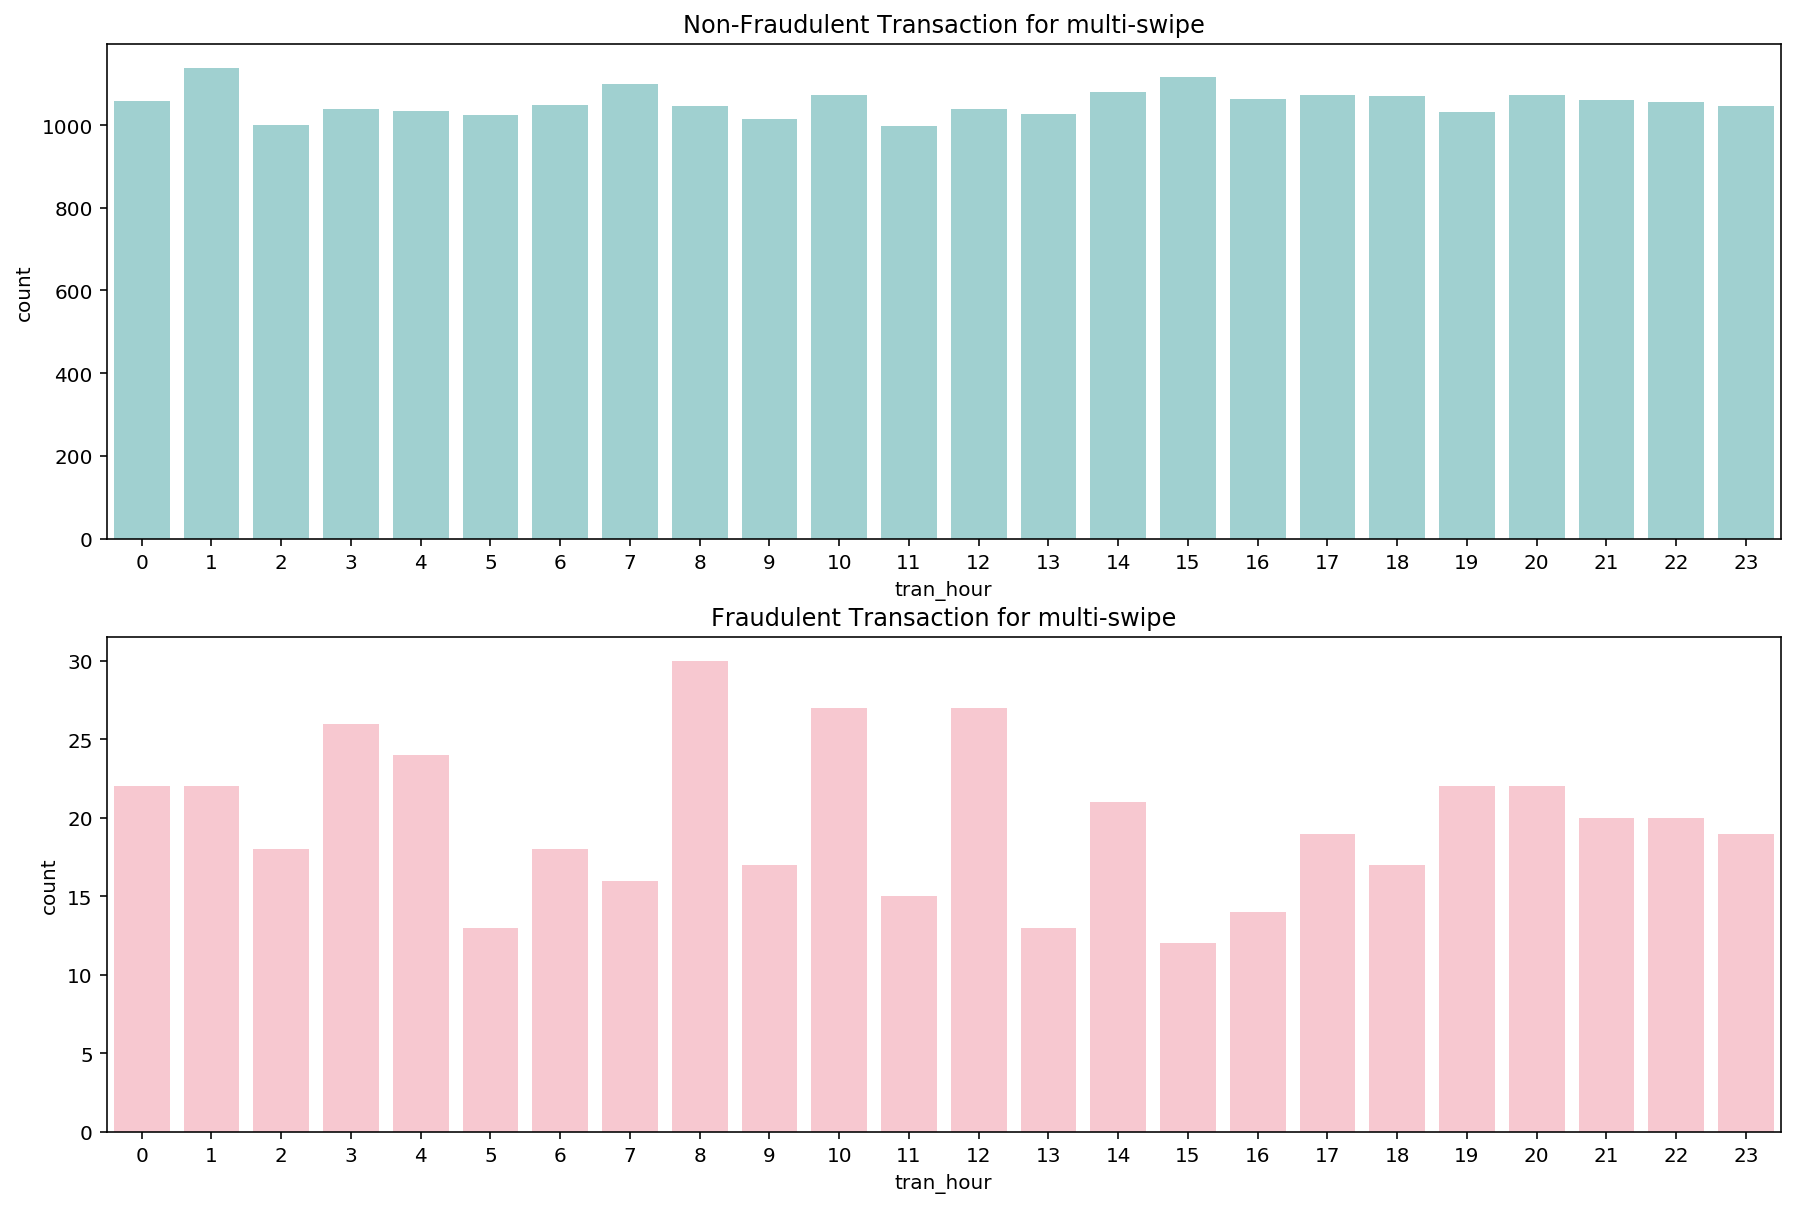

In [230]:
multi_180['tran_hour'] = multi_180['tran_time'].dt.hour
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

sns.countplot(
    x="tran_hour",
    data=multi_180[multi_180['isFraud'] == False], 
    color="#98D8D8", 
    ax=axes[0])
axes[0].set_title("Non-Fraudulent Transaction for multi-swipe")


sns.countplot(
    x="tran_hour",
    data = multi_180[multi_180['isFraud'] == True], 
    color="pink", 
    ax=axes[1])
axes[1].set_title("Fraudulent Transaction for multi-swipe")

 - Comparing with normal transactions in the multi-swipe category, fraudulent transactions are more frequent in online retail and online gifts. 


Text(0.5, 1.0, 'Fraudulent Transaction for multi-swipe')

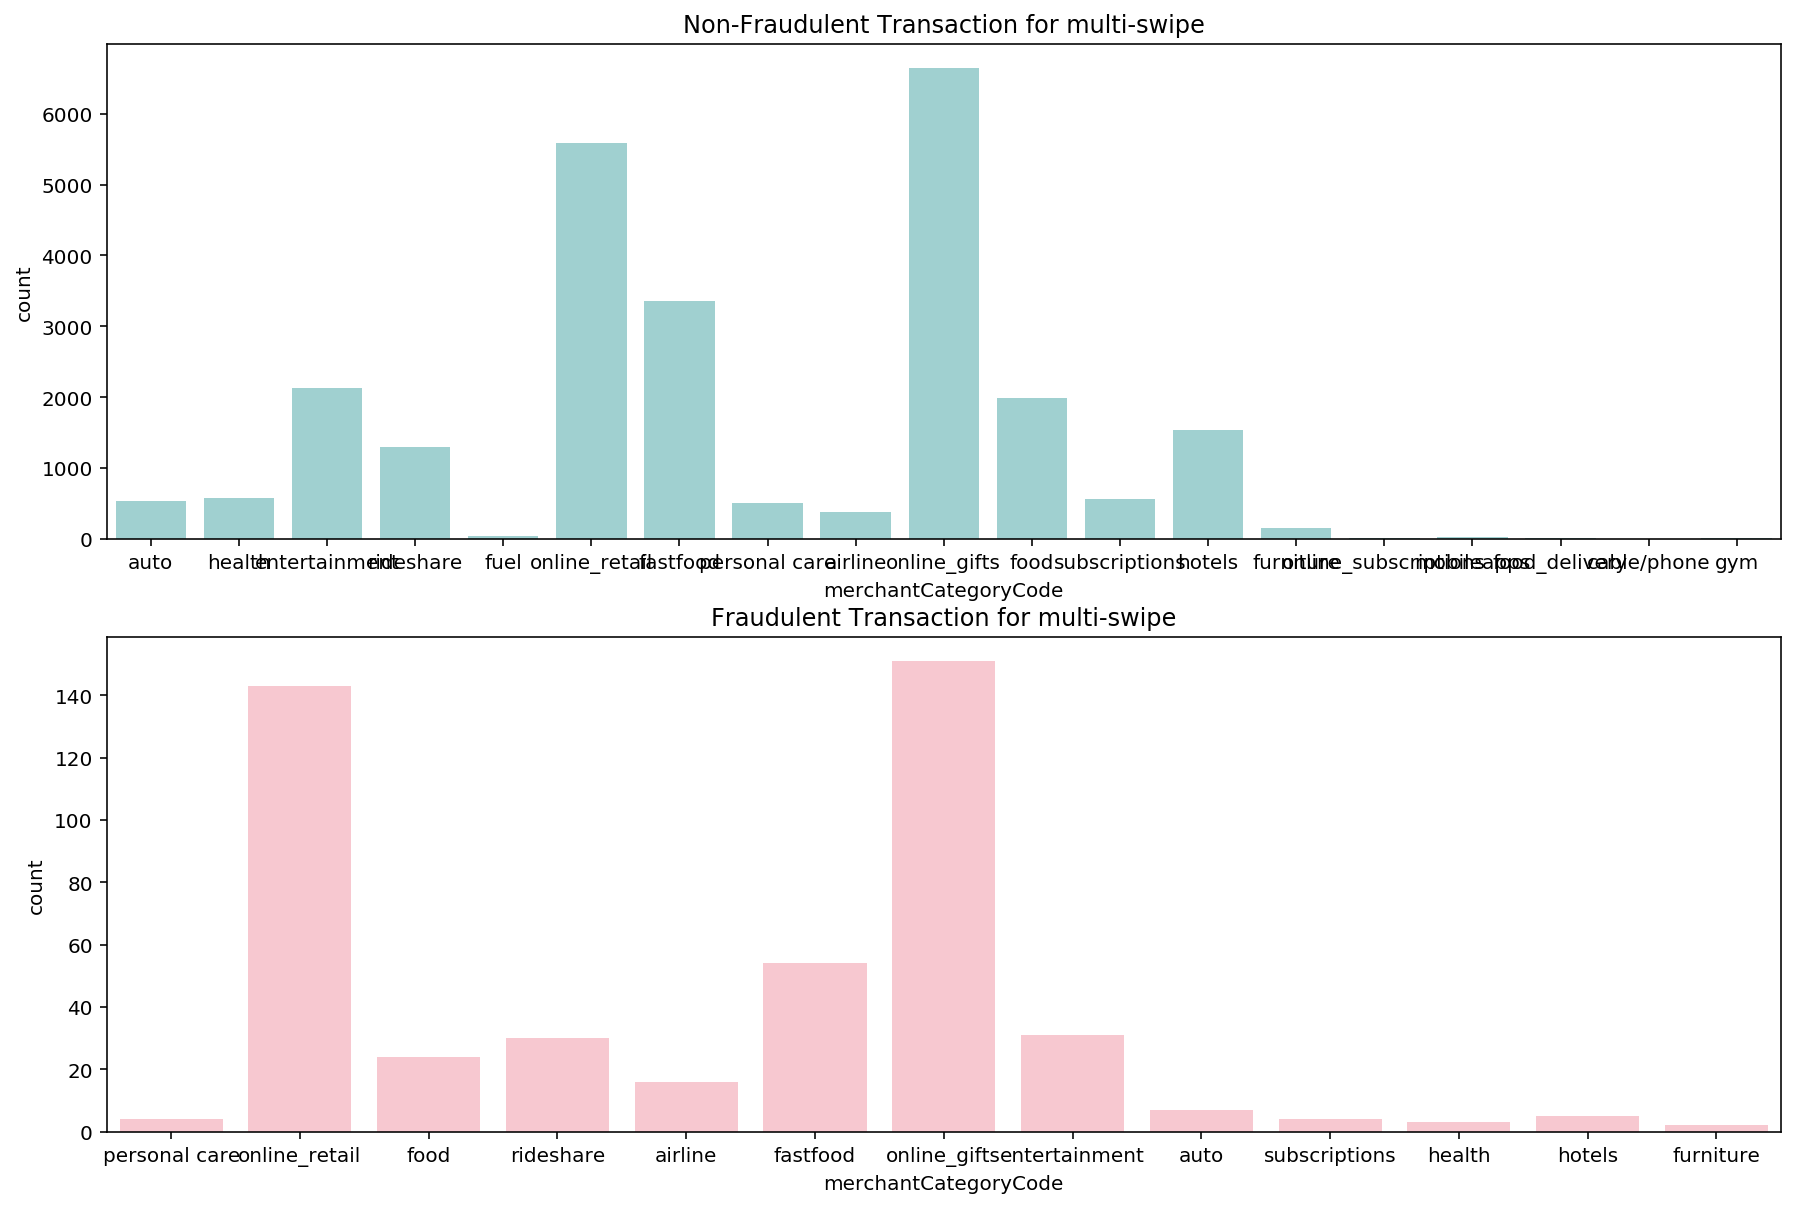

In [231]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

sns.countplot(
    x="merchantCategoryCode",
    data=multi_180[multi_180['isFraud'] == False], 
    color="#98D8D8", 
    ax=axes[0])
axes[0].set_title("Non-Fraudulent Transaction for multi-swipe")


sns.countplot(
    x="merchantCategoryCode",
    data = multi_180[multi_180['isFraud'] == True], 
    color="pink", 
    ax=axes[1])
axes[1].set_title("Fraudulent Transaction for multi-swipe")

 - Interestingly, normal reversed transactions are equally diatributed throughout the day while fraudulent reversed transactions show a peak at 3 AM.

Text(0.5, 1.0, 'Fraudulent Transaction for reversed')

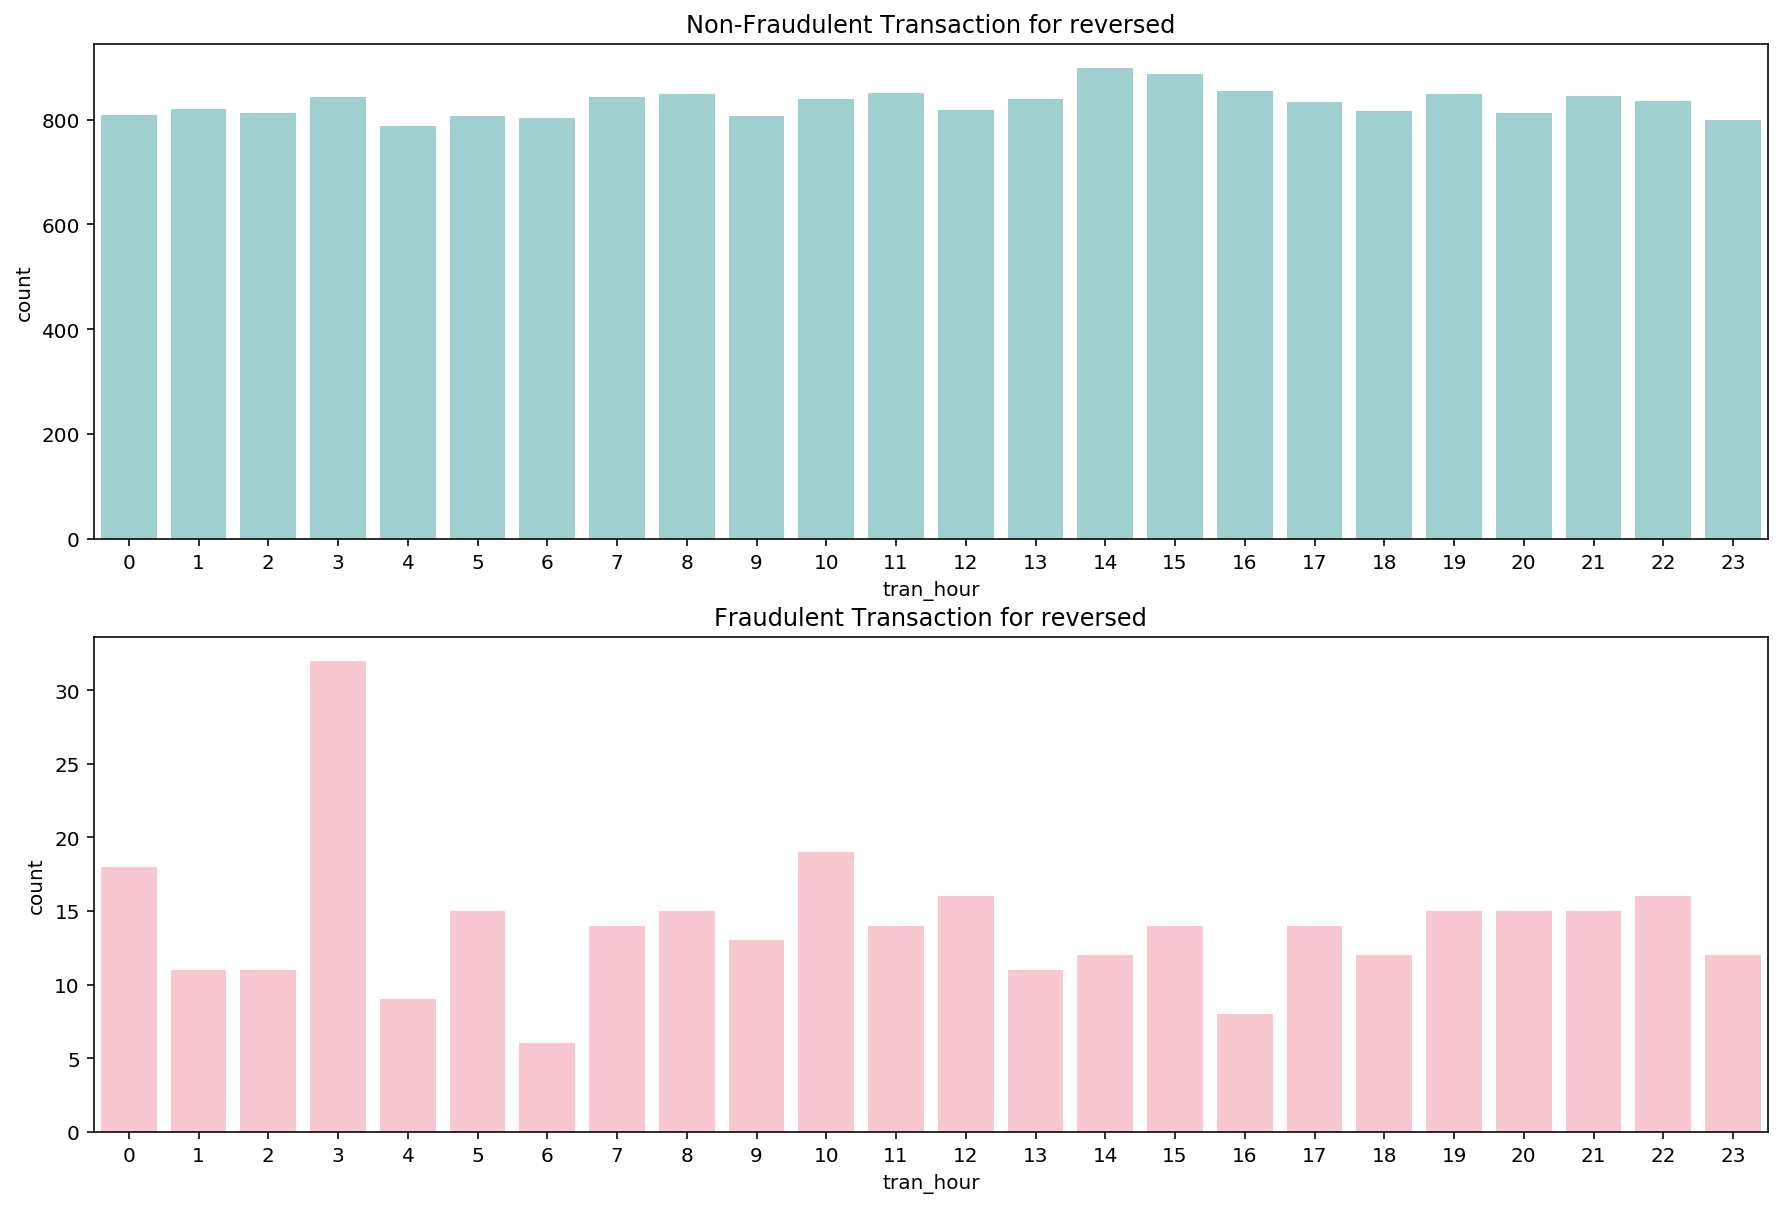

In [235]:
reversed_tra['tran_hour'] = reversed_tra['tran_time'].dt.hour
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

sns.countplot(
    x="tran_hour",
    data=reversed_tra[reversed_tra['isFraud'] == False], 
    color="#98D8D8",  
    ax=axes[0])
axes[0].set_title("Non-Fraudulent Transaction for reversed")


sns.countplot(
    x="tran_hour",
    data = reversed_tra[reversed_tra['isFraud'] == True], 
    color="pink", 
    ax=axes[1])
axes[1].set_title("Fraudulent Transaction for reversed")

 - Both non-fraudulent and fraudulent reversed transactions show a higher number in online retail and a similar trend is observed in other categories, meaning fraudulent transactions do not differ in merchant type for reversed transactions.

Text(0.5, 1.0, 'Fraudulent Transaction for reversed')

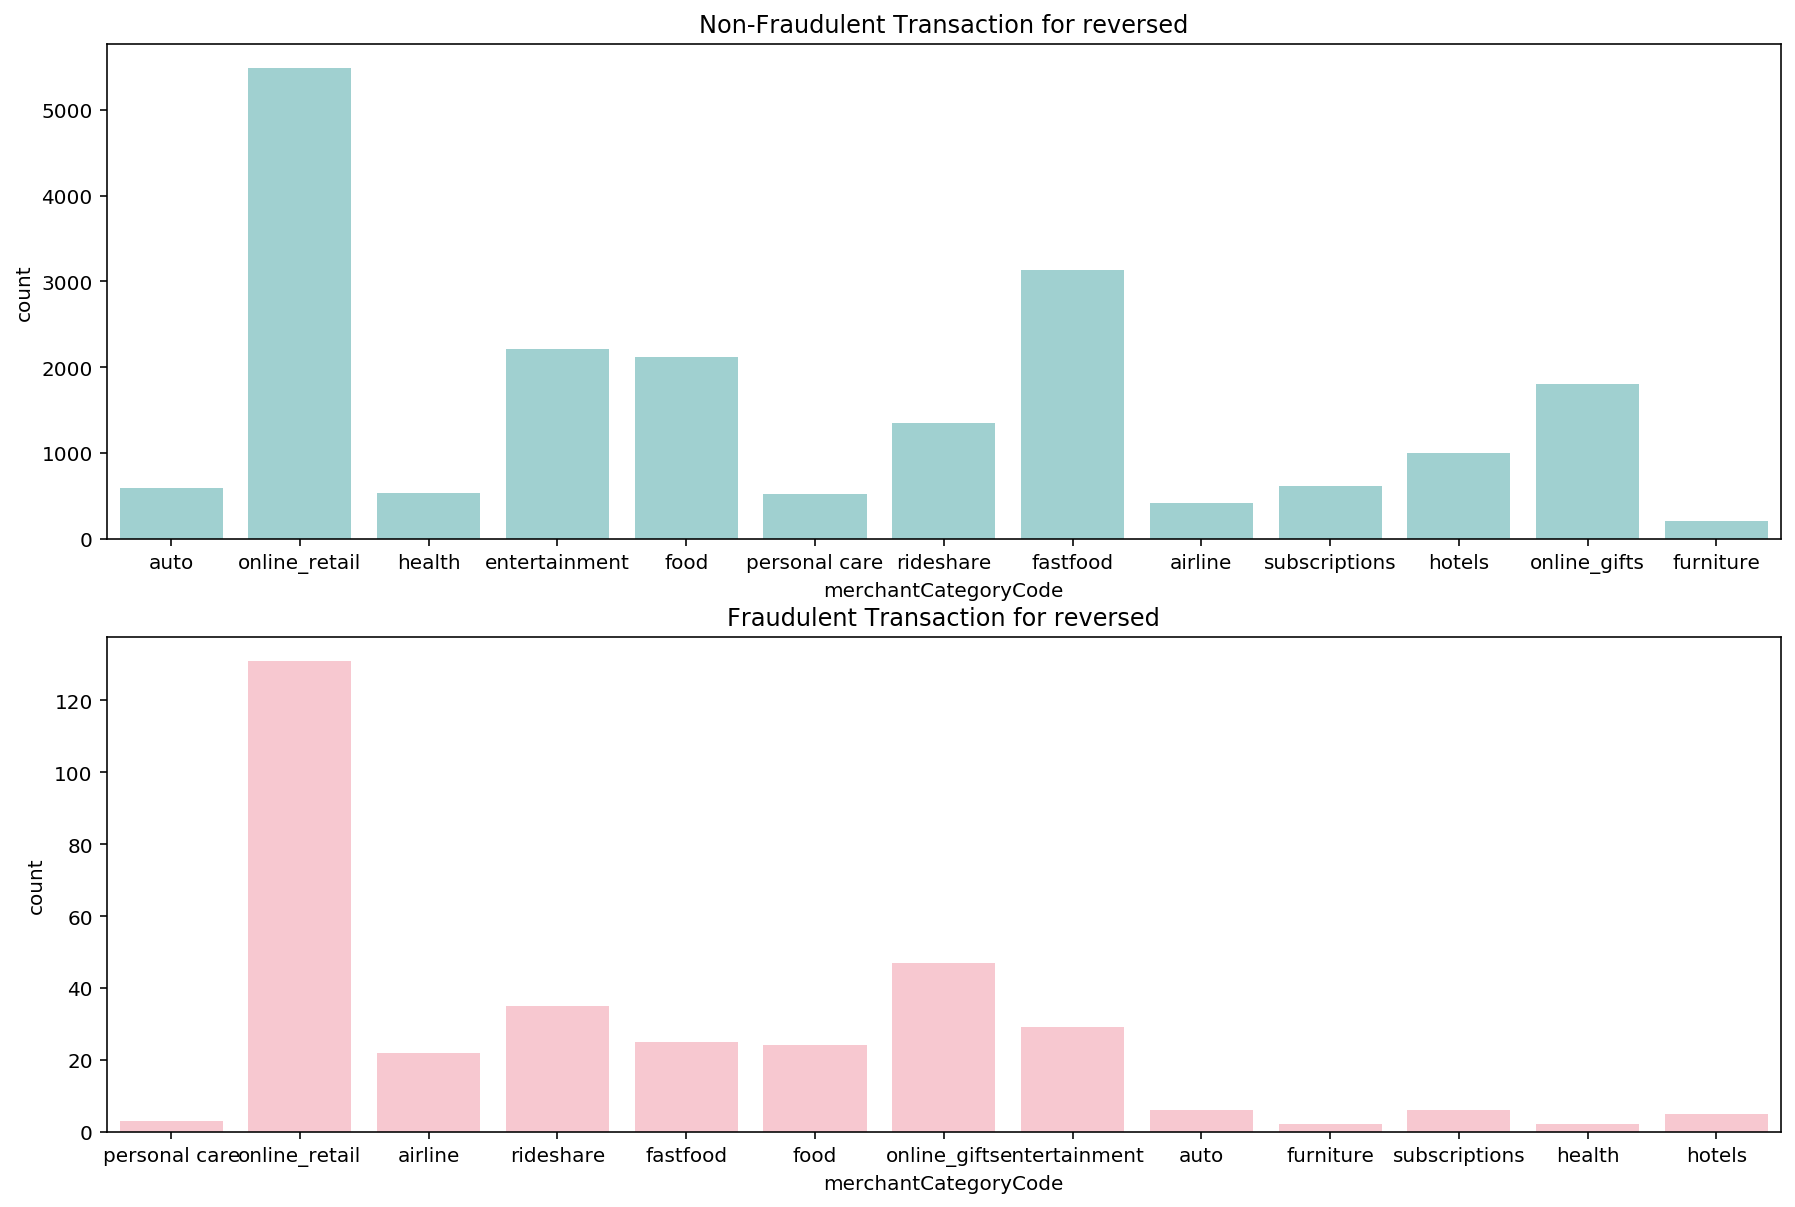

In [236]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

sns.countplot(
    x="merchantCategoryCode",
    data=reversed_tra[reversed_tra['isFraud'] == False], 
    color="#98D8D8",  
    ax=axes[0])
axes[0].set_title("Non-Fraudulent Transaction for reversed")


sns.countplot(
    x="merchantCategoryCode",
    data = reversed_tra[reversed_tra['isFraud'] == True], 
    color="pink", 
    ax=axes[1])
axes[1].set_title("Fraudulent Transaction for reversed")

## Question 4: Model

Fraud is a problem for any bank. Fraud can take many forms, whether it is someone stealing a single credit card, to large batches of stolen credit card numbers being used on the web, or even a mass compromise of credit card numbers stolen from a merchant via tools like credit card skimming devices.

**(1) Each of the transactions in the dataset has a field called isFraud. Please build a predictive model to determine whether a given transaction will be fraudulent or not. Use as much of the data as you like (or all of it)**

In [259]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from xgboost import plot_importance
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve,auc,precision_score,accuracy_score

**Imbalanced Dataset**

 - The dataset is highly imbalanced as most of the data points are not fraudulent transactions. This would be problematic because in the training process, the models will simply classify all the Positives as Negatives to reach a high accuracy while totally missing the key - to detect fraudulent transactions.

In [308]:
data_value= dt["isFraud"].value_counts()
print(data_value)
print(data_value/len(dt["isFraud"]))

False    773946
True      12417
Name: isFraud, dtype: int64
False    0.98421
True     0.01579
Name: isFraud, dtype: float64


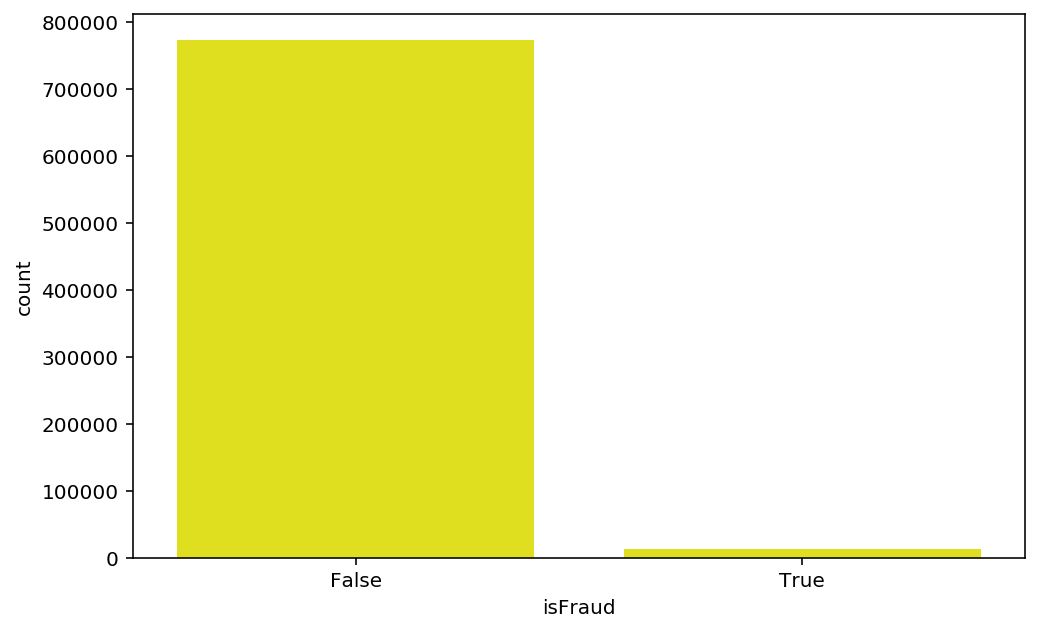

In [306]:
fig, (axis1) = plt.subplots(1,1,figsize=(8,5))
sns.countplot(x="isFraud", data=dt,color = "yellow")
plt.show()

 - After removing the reversed and multi-swipe transactions, the dataset is still highly imbalanacd.

In [7]:
ndt = dt[(dt.transactionType !="REVERSAL") & -((dt['diff_seconds']<180) & (dt['diff_seconds']>0) & (dt['same_account']==0))]

In [322]:
new_data_value= ndt["isFraud"].value_counts()
print(new_data_value)
print(new_data_value/len(ndt["isFraud"]))

False    735143
True      11727
Name: isFraud, dtype: int64
False    0.984298
True     0.015702
Name: isFraud, dtype: float64


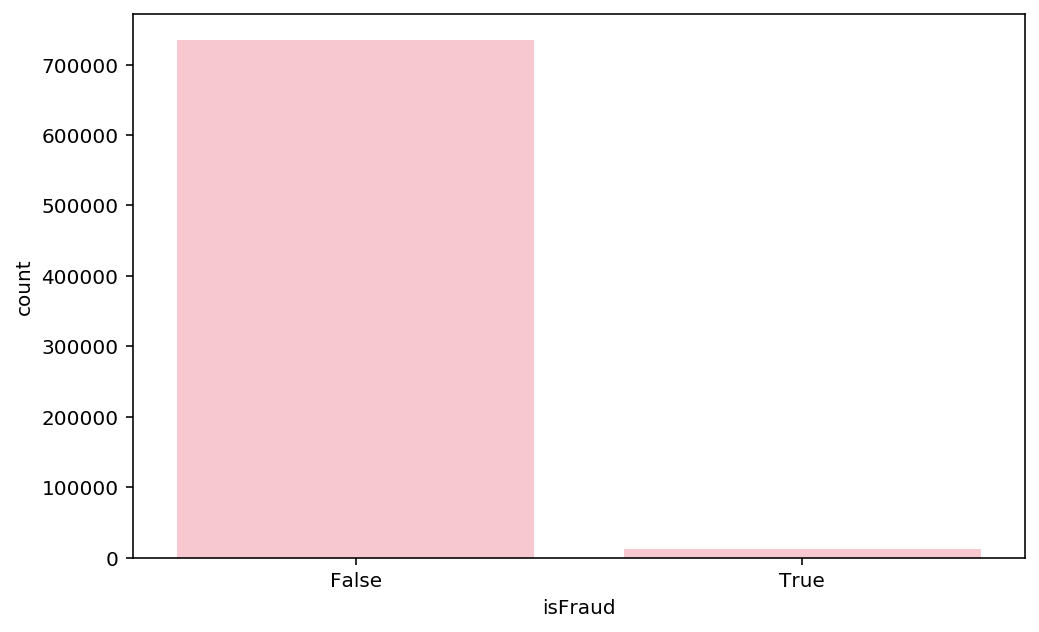

In [324]:
fig, (axis1) = plt.subplots(1,1,figsize=(8,5))
sns.countplot(x="isFraud", data=ndt,color = "pink")
plt.show()

**Data Preprocessing**

Since the data is highly imbalanced and has less informative features. I did the following data engineering:

 - First is to convert formats. I transformed time string into timastamp and created new variables of certain year/month/hour. 
 - Second is dropping features that are less informative or all nulls.
 - Finally, a plot of the correlations was created to help determine features of use. This dataset comes with as many as 29 features and usually are not all useful. So a correlation plot would assist in deciding features of use and what to discard. Here I used Pearson Correlation Matrix.

In [11]:
#converting formats

category = [
    'acqCountry',
    'merchantCategoryCode',
    'merchantCountryCode',
    'merchantName',
    'transactionType'
]

def convert(users,category):
    for i in category:
        users[i] = users[i].astype('category')
    return users

ndt = convert(ndt,category)
ndt['tran_hour'] = ndt['tran_time'].dt.hour
ndt['OpenDate'] = ndt['accountOpenDate'].apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))
ndt['current_ExpDate'] = ndt['currentExpDate'].apply(lambda x:datetime.strptime(x, '%m/%Y'))
ndt['dateLastAddressChange'] = ndt['dateOfLastAddressChange'].apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))
ndt = ndt.drop(['accountOpenDate','currentExpDate','dateOfLastAddressChange'],axis =1)

In [13]:
#remove null values
ndt = ndt.drop(["merchantState","echoBuffer","merchantCity","LastAddressChangeyear",
                 "openyear",'openmonth',"cardCVV","cardLast4Digits","customerId",
                 "enteredCVV","echoBuffer","posConditionCode","posEntryMode","accountNumber",
                 "merchantZip","merchantName","recurringAuthInd","posOnPremises",
                 "same_account","diff_seconds",
                 "transactionDateTime",'tran_time',"diff","OpenDate",'current_ExpDate',
                 "dateLastAddressChange"],axis = 1)

In [12]:
#creating new variables
ndt['tran_yr'] = ndt['tran_time'].dt.year
ndt['tran_min'] = ndt['tran_time'].dt.minute
ndt['Expyear'] = ndt['current_ExpDate'].dt.year 
ndt['Expmonth'] = ndt['current_ExpDate'].dt.month 
ndt['openyear'] = ndt['OpenDate'].dt.year
ndt['openmonth'] = ndt['OpenDate'].dt.month
ndt['LastAddressChangeyear'] = ndt['dateLastAddressChange'].dt.year

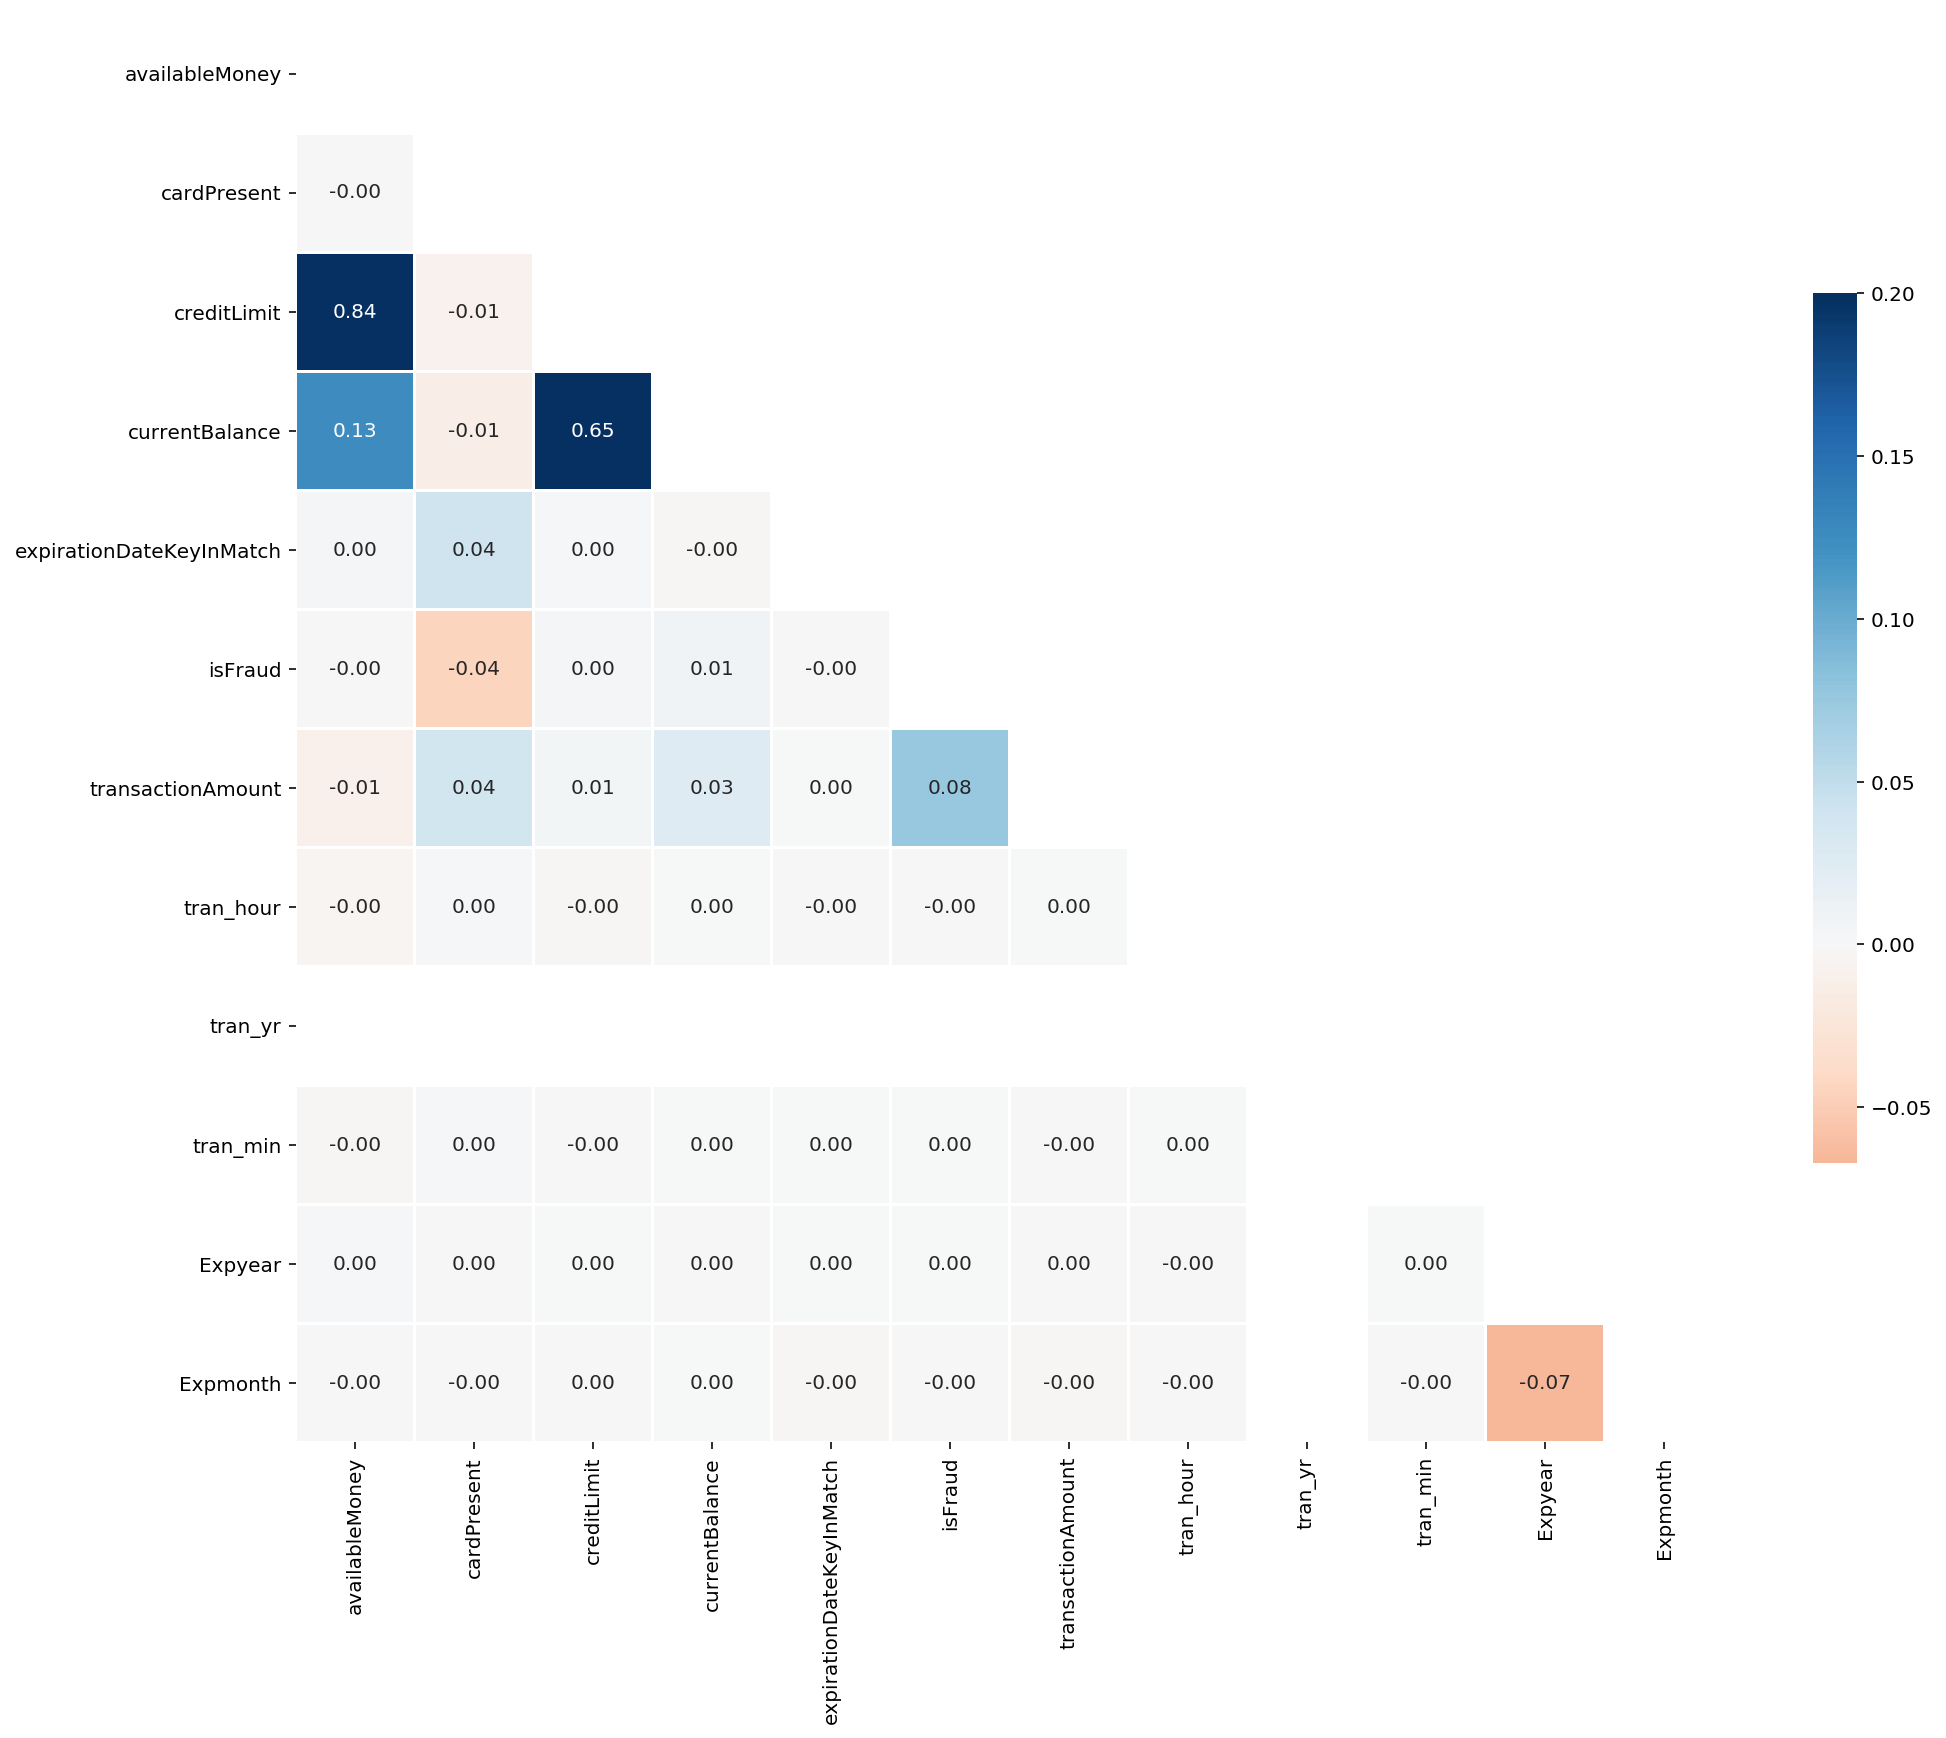

In [14]:
#plotting correlations
corr=ndt.corr(method='pearson')
plt.figure(figsize=(16, 16))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,cmap="RdBu", annot=True,fmt=".2f", mask=mask, 
    vmax=.2, center=0,square=True,linewidths=1, cbar_kws={"shrink": .5})

**Over-sampling Method**

 - This is one of the most common ways of dealing with imbalanced data. 
 - After splitting the dataset into train and test and I oversampled the Positive class and increased it to the number of Negative class.
 - Due to constraint of computational power, I randomly sample all datapoints to keep only 3% of them.


In [93]:
ddt = pd.get_dummies(ndt, columns=['acqCountry',"merchantCategoryCode","merchantCategoryCode","merchantCountryCode","transactionType"])

In [131]:
from sklearn.model_selection import train_test_split
#X = ddt.drop(["isFraud"],axis=1)
y = ddt['isFraud']
x_tr, x_te, y_tr, y_te = train_test_split(ddt, y, test_size = 0.3)

In [132]:
neg = x_tr[x_tr["isFraud"]==False] 
pos = x_tr[x_tr["isFraud"]==True] 

In [138]:
negt = x_te[x_te["isFraud"]==False] 
post = x_te[x_te["isFraud"]==True] 

In [142]:
pos_over = pos.sample(15000, replace=True)
neg_sample = neg.sample(15000)
x_trr = pd.concat([pos_over, neg_sample], axis=0)
x_tr = x_trr.drop(["isFraud"],axis=1)
y_tr = x_trr["isFraud"]

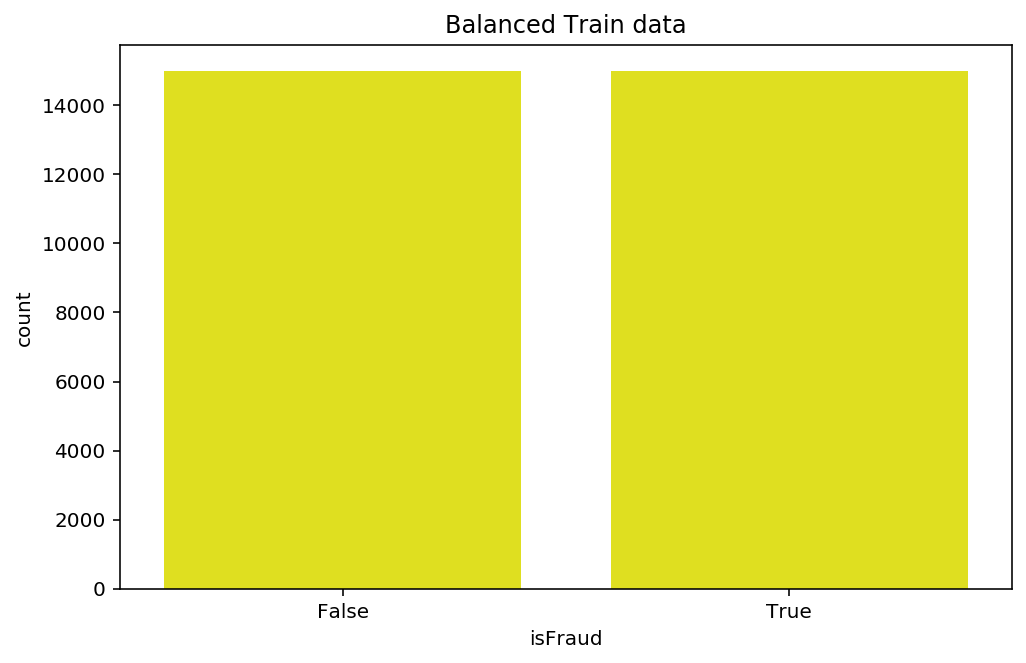

In [255]:
fig, (axis1) = plt.subplots(1,1,figsize=(8,5))
sns.countplot(x = 'isFraud',data=x_trr,color = "yellow").set_title("Balanced Train data")
plt.show()

In [144]:
pos_overe = post.sample(6500, replace=True)
neg_samplee = negt.sample(6500)
x_tee = pd.concat([pos_overe, neg_samplee], axis=0)
x_te = x_tee.drop(["isFraud"],axis=1)
y_te = x_tee["isFraud"]

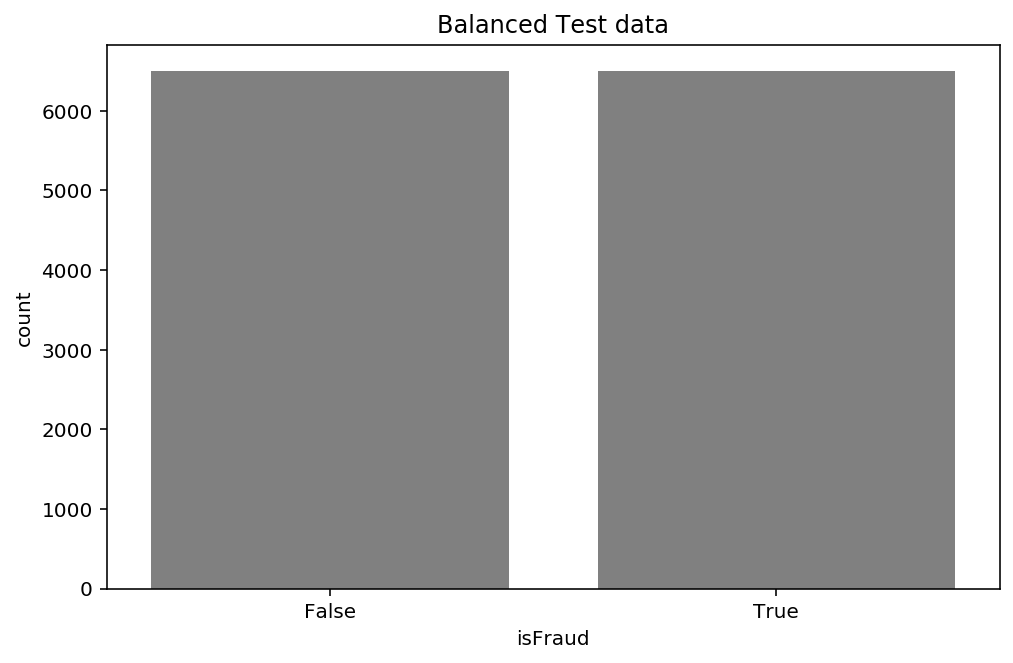

In [256]:
fig, (axis1) = plt.subplots(1,1,figsize=(8,5))
sns.countplot(x = 'isFraud',data=x_tee,color = "grey").set_title("Balanced Test data")
plt.show()

**Model Fitting**

 - I chose Logistic Regression as the base model since it is the most simple method in prediction of classifications. And compared result with Random Forest, Multilayer Perceptron and XGBoost.

In [260]:
# Logistic Regression
t0 = time.time()
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(
    class_weight='balanced', 
    max_iter=5000, 
    random_state=42
).fit(x_tr, y_tr)
t1 = time.time()
print("Baseline logistic regression training data accuracy is :{}".format(lr.score(x_tr, y_tr)))

lryhat = lr.predict(x_te)
lryproba = lr.predict_proba(x_te)

lrprecision, lrrecall,_ = precision_recall_curve(y_te, lryproba[:,1])
lrfpr,lrtpr, _ = roc_curve(y_te, lryproba[:,1])
lr_roc_auc = auc(lrfpr, lrtpr)
print("Baseline logistic regression test data accuracy is :{}".format(lr.score(x_te,y_te)))
print( "Traing time for Baseline logistic regression is :{}".format(t1-t0))


Baseline logistic regression training data accuracy is :0.6158333333333333
Baseline logistic regression test data accuracy is :0.6116153846153846
Traing time for Baseline logistic regression is :0.683772087097168


In [261]:
#Multilayer Perceptron
t0 = time.time()
mlp = MLPClassifier(
    solver='lbfgs', 
    activation='logistic', 
    hidden_layer_sizes=(7,7,7),
    learning_rate='constant', 
    max_iter=2000, 
    random_state=10
).fit(x_tr, y_tr)
t1 = time.time()

print("Multilayer Perceptron training data accuracy is :{}".format(mlp.score(x_tr, y_tr)))

mlpyhat = mlp.predict(x_te)
mlpyproba = mlp.predict_proba(x_te)

mlpprecision, mlprecall,_ = precision_recall_curve(y_te, mlpyproba[:,1])
mlpfpr,mlptpr, _ = roc_curve(y_te, mlpyproba[:,1])
mlp_roc_auc = auc(mlpfpr, mlptpr)
print("Multilayer Perceptron test data accuracy is :{}".format(mlp.score(x_te,y_te)))
print( "Traing time for Multilayer Perceptron is :{}".format(t1-t0))

Multilayer Perceptron training data accuracy is :0.6226333333333334
Multilayer Perceptron test data accuracy is :0.6244615384615385
Traing time for Multilayer Perceptron is :39.24197006225586


In [262]:
#Random Forest
t0 = time.time()
rf = RandomForestClassifier(
    n_estimators=500, 
    criterion = 'gini', 
    max_depth = 4, 
    class_weight='balanced', 
    random_state=10
).fit(x_tr, y_tr)
t1 = time.time()


print("Random Forest training data accuracy is :{}".format(rf.score(x_tr, y_tr)))

rfyhat = rf.predict(x_te)
rfyproba = rf.predict_proba(x_te)

rfprecision, rfrecall,_ = precision_recall_curve(y_te, rfyproba[:,1])
rffpr,rftpr, _ = roc_curve(y_te, rfyproba[:,1])
rf_roc_auc = auc(rffpr, rftpr)
print("Random Forest test data accuracy is : {}".format(rf.score(x_te,y_te)))
print( "Traing time for Random Forest is :{}".format(t1-t0))


Random Forest training data accuracy is :0.6406
Random Forest test data accuracy is : 0.6426153846153846
Traing time for Random Forest is :8.97321605682373


In [263]:
#XGboost
from xgboost import XGBClassifier

x_trxgb = x_tr.loc[:,~x_tr.columns.duplicated()]
x_texgb = x_te.loc[:,~x_te.columns.duplicated()]
t0 = time.time()

xgb = XGBClassifier(random_state = 10, n_jobs = -1,eta=0.15,gamma=2,max_depth=10)  
xgb.fit(x_trxgb, y_tr)
t1 = time.time()


print("XGboost training data accuracy is :{}".format(xgb.score(x_trxgb, y_tr)))

xgbyhat = xgb.predict(x_texgb)
xgbyproba = xgb.predict_proba(x_texgb)

xgbprecision, xgbrecall,_ = precision_recall_curve(y_te, xgbyproba[:,1])
xgbfpr,xgbtpr, _ = roc_curve(y_te, xgbyproba[:,1])
xgb_roc_auc = roc_auc_score(y_te, xgbyproba[:,1])
print("XGboost test data accuracy is : {}".format(xgb.score(x_texgb,y_te)))
print( "Traing time for XGboost is :{}".format(t1-t0))


XGboost training data accuracy is :0.8489666666666666
XGboost test data accuracy is : 0.6710769230769231
Traing time for XGboost is :14.280269145965576


**(2) Provide an estimate of performance using an appropriate sample, and show your work.**

Following are confusion matrixs, accuracy, precision, recall values, and AUC of four models of choice on train/test dataset.

In [264]:
print(" ====== Classification Baseline Logistic ====== ")
print(classification_report(y_te, lryhat))
print(" ====== Classification Random Forest ====== ")
print(classification_report(y_te, rfyhat))
print(" ====== Classification Multilayer Perceptron ====== ")
print(classification_report(y_te, mlpyhat))
print(" ====== Classification XGBoosting ====== ")
print(classification_report(y_te, xgbyhat))

 ====== Classification Baseline Logistic ====== 
              precision    recall  f1-score   support

       False       0.59      0.71      0.65      6500
        True       0.64      0.51      0.57      6500

    accuracy                           0.61     13000
   macro avg       0.62      0.61      0.61     13000
weighted avg       0.62      0.61      0.61     13000

 ====== Classification Random Forest ====== 
              precision    recall  f1-score   support

       False       0.64      0.66      0.65      6500
        True       0.65      0.63      0.64      6500

    accuracy                           0.64     13000
   macro avg       0.64      0.64      0.64     13000
weighted avg       0.64      0.64      0.64     13000

 ====== Classification Multilayer Perceptron ====== 
              precision    recall  f1-score   support

       False       0.63      0.60      0.61      6500
        True       0.62      0.65      0.63      6500

    accuracy                       

**Model Performace**

 - Random Forest and Multilayer Perceptron showed similar performance to baseline model, around 0.61-0.64, meaning model correctly classified around 61% - 64% of the data.

 - XGBoost model is currently the best model with accuracy of 0.67 on test data and 0.85 on training data.

 - Four models have similar performances predicting Positive and Negative values based on precision and recall values.

**Overfitting**

XGBoost is the only model which accuracy on training data is much higher than test data, so overfitting occurred. Overfitting on training data would lead to lower predictability facing unseen datasets. Further tuning the model would improve it with a **trade-off** on accuracy and overfitting.

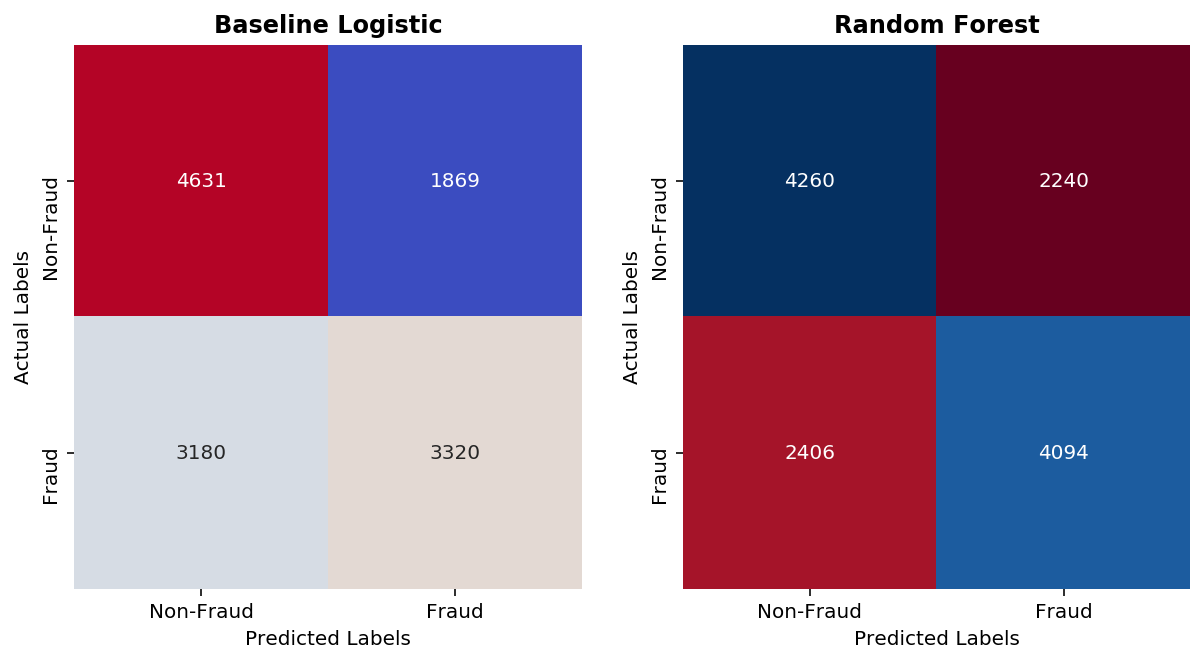

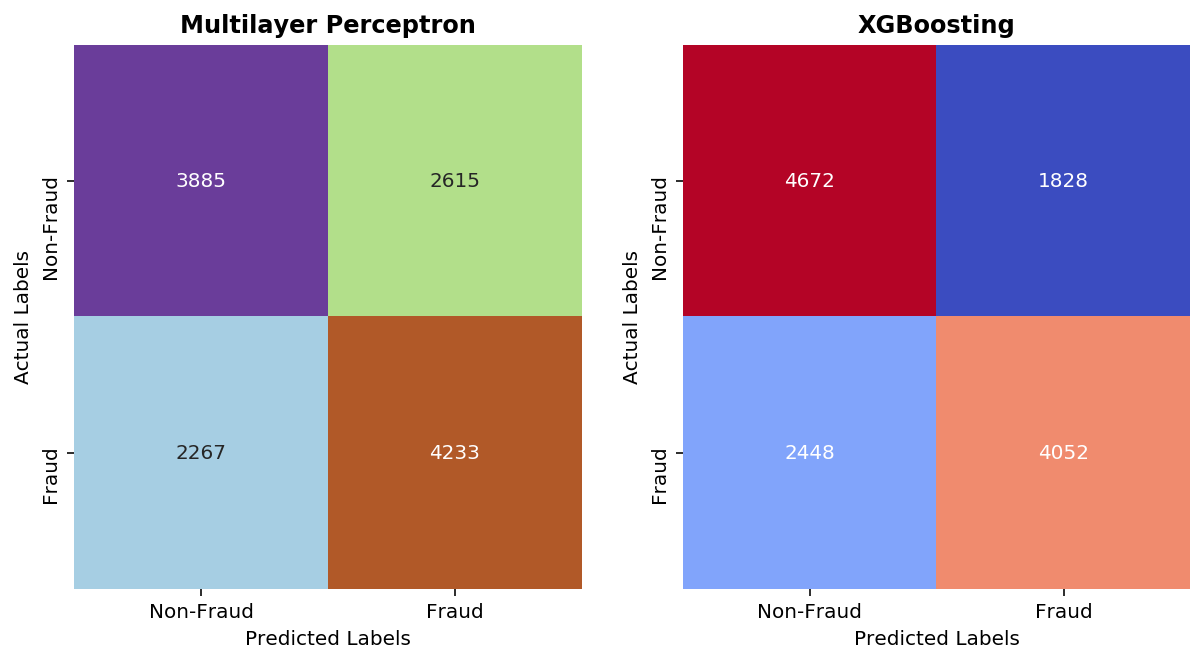

In [265]:
#confusion matrixs
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.heatmap(confusion_matrix(y_te, lryhat), annot=True, fmt="d",cbar=False, cmap="coolwarm", ax = ax[0])
ax[0].set_title("Baseline Logistic", weight='bold')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('Actual Labels')
ax[0].yaxis.set_ticklabels(['Non-Fraud', 'Fraud'])
ax[0].xaxis.set_ticklabels(['Non-Fraud', 'Fraud'])



sns.heatmap(confusion_matrix(y_te, rfyhat), annot=True, fmt="d",cbar=False, cmap="RdBu", ax = ax[1])
ax[1].set_title("Random Forest", weight='bold')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('Actual Labels')
ax[1].yaxis.set_ticklabels(['Non-Fraud', 'Fraud'])
ax[1].xaxis.set_ticklabels(['Non-Fraud', 'Fraud'])


fig, axe = plt.subplots(1, 2, figsize=(10, 5))

sns.heatmap(confusion_matrix(y_te, mlpyhat), annot=True, fmt="d",cbar=False, cmap="Paired", ax = axe[0])
axe[0].set_title("Multilayer Perceptron", weight='bold')
axe[0].set_xlabel('Predicted Labels')
axe[0].set_ylabel('Actual Labels')
axe[0].yaxis.set_ticklabels(['Non-Fraud', 'Fraud'])
axe[0].xaxis.set_ticklabels(['Non-Fraud', 'Fraud'])

sns.heatmap(confusion_matrix(y_te, xgbyhat), annot=True, fmt="d",cbar=False, cmap="coolwarm", ax = axe[1])
axe[1].set_title("XGBoosting", weight='bold')
axe[1].set_xlabel('Predicted Labels')
axe[1].set_ylabel('Actual Labels')
axe[1].yaxis.set_ticklabels(['Non-Fraud', 'Fraud'])
axe[1].xaxis.set_ticklabels(['Non-Fraud', 'Fraud'])
plt.show()

**False Positives**

In this particular situation, the most prior goal is to successfully predict a fraud before it occurred. One reminder of possible fraud does not take much effort and resources so the punishment on false Negatives is relatively small while in contrast, one failure to detect a fraud transaction would lead potentially serious monetary loss.

 - Of the four models, Random Forest and XGBoost are best at capturing Fraud transactions and minimal number of False Positives (2406 for Random Forest and 2448 for XGBoost)

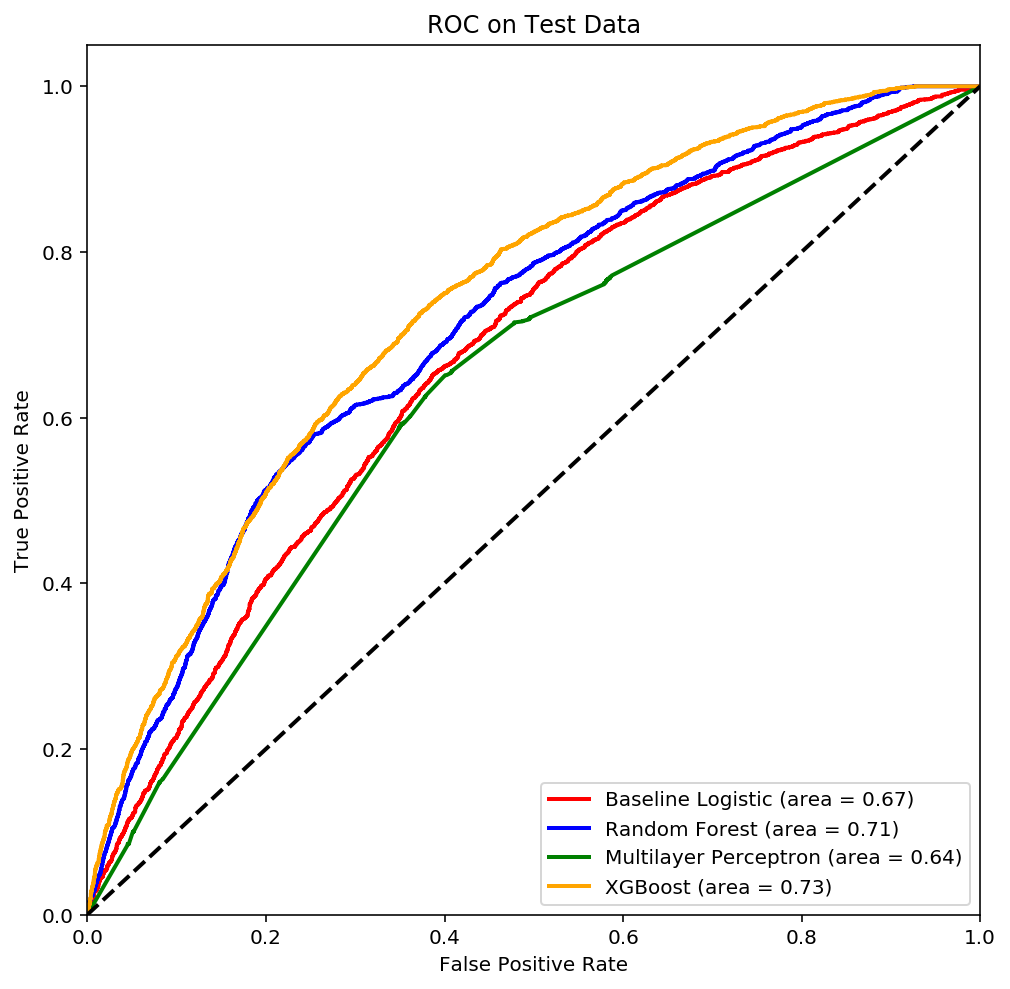

In [266]:
plt.figure(figsize=(8, 8))
plt.plot(lrfpr, lrtpr, color='red',lw=2,label='Baseline Logistic (area = %0.2f)' % lr_roc_auc)
plt.plot(rffpr, rftpr, color='blue',lw=2, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(mlpfpr, mlptpr, color='green',lw=2, label='Multilayer Perceptron (area = %0.2f)' % mlp_roc_auc)
plt.plot(xgbfpr, xgbtpr, color='orange',lw=2, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC on Test Data')
plt.legend(loc="lower right")
plt.show()

**ROC curve**

Another most commonly used method of comparing model performance is plotting the ROC curve. From the above plot, the yellow line representing XGBoost has biggest Area Under Curve - AUC value. 

 - Combining the previous analysis, XGBoost is chose as final model.

**(3)Please explain your methodology (modeling algorithm/method used and why, what features/data you found useful, what questions you have, and what you would do next with more time)**



**Feature Selection**

My workflow of feature selection is summarized as:

 - Remove Feature with all/most Missing values
 - Convert time string into timestamp, then creat new feature of year/month/hour
 - Create Correlation Matrix, remove features of low correlation

The final features of choice include: 

availableMoney, cardPresent, currentBalance, expirationDateKeyInMatch, transactionAmount, tran_hour, tran_yr, tran_min, Expyear, Expmonth, acqCountry, merchantCategoryCode, merchantCountryCode

**XGBoost**

XGBoost is a popular model due to its speed and performance. The core implementation is gradient boosted decision trees. This led to  efficiency of time and computational resources. 

Using Gradient boosting, XGBoost could create new models to predict the residuals or errors of prior models, then combine these model for final prediction. Models are combined sequentially until no further improvements. This continued training allows us to  further boost fitted models with new data, which reduces training workload. It also supports the parallelization of tree construction and helps improve model performance.

The XGBoost model in this data took 14 seconds to train, much less than the MLP model of 39 seconds and slightly more than 9 seconds of using Random Forest. Taking into consideration of its accuracy, precision and recall values, XGBoost is indeed the best model both in terms of time consumption and computational resources.

**Area of Improvement**

 - Domain Knowledge
 
 It would be useful to have deeper understanding of the dataset. Certain CVVs may have realistic association. And the transaction amount may have thresholds for further classifying into small, medium and large transaction. Also information regarding the cardholder, such as past fraudulent records would be useful without disclosing personal information or security concerns.


 - Ensemble Strategy

 Combine Models:  Since this is a rather complicated dataset, I plan on building my own neural network, such as taking KNN models as first hidden layer and take its results to build next layer, which may use a different base algorithm such as Logistic regression. Combining results and feeding into next models is the simple representation of neural networks which generally yield satisfactory performance.
 

 - Data Strategy
 
 Data Transformation: Reshape the data to fit into certain distributions could help better accommodate to certain algorithms.

 Feature Engineering:  Feature decomposition, aggregation, creation are other common methods for better data quality. 
 
 
 - Tuning Strategy
 
 Consult Experts: Finding the right parameters could take experience and research into the area. Consulting related professors, resources are are possible choices for finding suitable parameters.

 Grid Search: I could create a list of popular and possible parameters and loop through all combinations to find the pair with the best performance. 
